# Team Performance Predictability

The aim of this study was to build a model that could accurately predict the outcome of future league football matches. Success was judged using the following two objectives, one quantitative and one qualitative:

Achieve a test accuracy of greater than 50%, with a stretch target of 60%.
Output probabilities that appear sensible/realistic, that are comparable to odds offered on popular betting websites.

### Dataset
The data was collected directly from datahub.io. Data was initially collected from the 1993-2024 top five league season 

In [ ]:
import pandas as pd

# Load the air quality dataset
premier_league_datasample = pd.read_csv('data/premier-league/season-2425.csv')

premier_league_datasample.head()

## Data Understanding

FTHG: Full-Time Home Goals – The total number of goals scored by the home team at full time.

FTAG: Full-Time Away Goals – The total number of goals scored by the away team at full time.

FTR: Full-Time Result – The result of the match at full time, typically represented as:

H: Home win
D: Draw
A: Away win
HTHG: Half-Time Home Goals – The total number of goals scored by the home team by half time.

HTAG: Half-Time Away Goals – The total number of goals scored by the away team by half time.

HTR: Half-Time Result – The result of the match at half time, represented similarly to FTR:

H: Home win
D: Draw
A: Away win
Referee: The official responsible for enforcing the rules of the game, maintaining discipline, and ensuring fair play during the match.

HS: Home Shots – The total number of shots (on target and off target) taken by the home team.

AS: Away Shots – The total number of shots (on target and off target) taken by the away team.

HST: Home Shots on Target – The total number of shots taken by the home team that were on target.

AST: Away Shots on Target – The total number of shots taken by the away team that were on target.

HF: Home Fouls – The total number of fouls committed by the home team.

AF: Away Fouls – The total number of fouls committed by the away team.

HC: Home Corners – The total number of corner kicks awarded to the home team.

AC: Away Corners – The total number of corner kicks awarded to the away team.

HY: Home Yellow Cards – The total number of yellow cards given to players of the home team.

AY: Away Yellow Cards – The total number of yellow cards given to players of the away team.

HR: Home Red Cards – The total number of red cards given to players of the home team.

AR: Away Red Cards – The total number of red cards given to players of the away team.

In [4]:
# Display a summary of the dataset
def dataset_summary(df):
    print("=== Dataset Summary ===\n")
    print("Shape of the dataset:", df.shape)
    print("\nColumns and Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("\nSample Data:")
    print(df.head())

# Call the summary function
dataset_summary(premier_league_datasample)

=== Dataset Summary ===

Shape of the dataset: (199, 22)

Columns and Data Types:
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

Missing Values:
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

Descriptive Statistics:
            Date     HomeTeam AwayTeam        FTHG        FTAG  FTR  \
count        199          199      199  199.000000  

## Data Preparation 
This section will involve cleaning the data, handling missing values, and encoding categorical variables. For each League we will combine all the data to produce a single dataset. And handle it from that point. 

#### Combining all the Seasons
Premier League

In [6]:
import glob
import os

# Path to the folder containing the season datasets
data_folder = "data/premier-league" 

# Get all file paths matching the pattern "season-XXXX.csv"
file_paths = glob.glob(os.path.join(data_folder, "season-*.csv"))

# Create an empty list to store dataframes
dataframes = []

# Process each file
for file_path in file_paths:
    # Extract season year from filename
    season_year = os.path.basename(file_path).split('-')[1].split('.')[0]  # Assumes file names like "season-1993.csv"
    
    # Read the dataset
    df = pd.read_csv(file_path)
    
    # Add the season column as the first column
    df.insert(0, 'Season', season_year)

    # Append the dataframe to the list
    dataframes.append(df)

# Combine all the dataframes into one
eplcombined_data = pd.concat(dataframes, ignore_index=True)

# Save the combined dataset in the same folder
output_path = os.path.join(data_folder, "eplcombined_seasons_data.csv")
eplcombined_data.to_csv(output_path, index=False)

print("All season datasets combined successfully!")
print("Combined dataset saved at:", output_path)
print("Combined dataset shape:", eplcombined_data.shape)

PermissionError: [Errno 13] Permission denied: 'data/premier-league\\eplcombined_seasons_data.csv'

In [64]:
eplcombined_data.head(20)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0001,2000-08-19,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0
1,0001,2000-08-19,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0
2,0001,2000-08-19,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0
3,0001,2000-08-19,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0
4,0001,2000-08-19,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0
5,0001,2000-08-19,Leicester,Aston Villa,0,0,D,0.0,0.0,D,...,4.0,3.0,12.0,12.0,5.0,4.0,2.0,3.0,0.0,0.0
6,0001,2000-08-19,Liverpool,Bradford,1,0,H,0.0,0.0,D,...,10.0,2.0,8.0,8.0,6.0,1.0,1.0,1.0,0.0,0.0
7,0001,2000-08-19,Sunderland,Arsenal,1,0,H,0.0,0.0,D,...,2.0,7.0,10.0,21.0,2.0,9.0,3.0,1.0,0.0,1.0
8,0001,2000-08-19,Tottenham,Ipswich,3,1,H,2.0,1.0,H,...,6.0,5.0,14.0,13.0,3.0,4.0,0.0,0.0,0.0,0.0
9,0001,2000-08-20,Man United,Newcastle,2,0,H,1.0,0.0,H,...,9.0,6.0,7.0,13.0,7.0,1.0,0.0,1.0,0.0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Date' to datetime
eplcombined_data2 = eplcombined_data.copy()
eplcombined_data2['Date'] = pd.to_datetime(eplcombined_data2['Date'], format='%d/%m/%y')

# 1. Label Encoding for Ordinal Columns (Match Results: FTR, HTR)
label_encoder = LabelEncoder()

# Encode Full-Time Result (FTR) and Half-Time Result (HTR)
eplcombined_data2['FTR'] = label_encoder.fit_transform(eplcombined_data2['FTR'])
eplcombined_data2['HTR'] = label_encoder.fit_transform(eplcombined_data2['HTR'])

# Define the mapping based on your custom values
custom_mapping = {0: 2, 1: 0, 2: 1}  # Custom mapping: 0 -> Draw, 1 -> Home, 2 -> Away

# Apply the custom mapping to the encoded columns
eplcombined_data2['FTR'] = eplcombined_data2['FTR'].map(custom_mapping)
eplcombined_data2['HTR'] = eplcombined_data2['HTR'].map(custom_mapping)

# 2. One-Hot Encoding for Nominal Columns (HomeTeam, AwayTeam, Referee)
# One-Hot Encoding of categorical columns (teams and referee)
eplcombined_data2 = pd.get_dummies(eplcombined_data2, columns=['Referee'], drop_first=True)

# Verify the changes
eplcombined_data2.head(20)


,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Referee_l Mason,Referee_ A D'Urso,Referee_ A Wiley,Referee_ C Foy,Referee_ D Gallagher,Referee_ H Webb,Referee_ M Atkinson,Referee_ N Barry,Referee_ S Dunn,Referee_ U Rennie
0,0001,2000-08-19,Charlton,Man City,4,0,1,2.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,0001,2000-08-19,Chelsea,West Ham,4,2,1,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,0001,2000-08-19,Coventry,Middlesbrough,1,3,2,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0001,2000-08-19,Derby,Southampton,2,2,0,1.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,0001,2000-08-19,Leeds,Everton,2,0,1,2.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
5,0001,2000-08-19,Leicester,Aston Villa,0,0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
6,0001,2000-08-19,Liverpool,Bradford,1,0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
7,0001,2000-08-19,Sunderland,Arsenal,1,0,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8,0001,2000-08-19,Tottenham,Ipswich,3,1,1,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9,0001,2000-08-20,Man United,Newcastle,2,0,1,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False


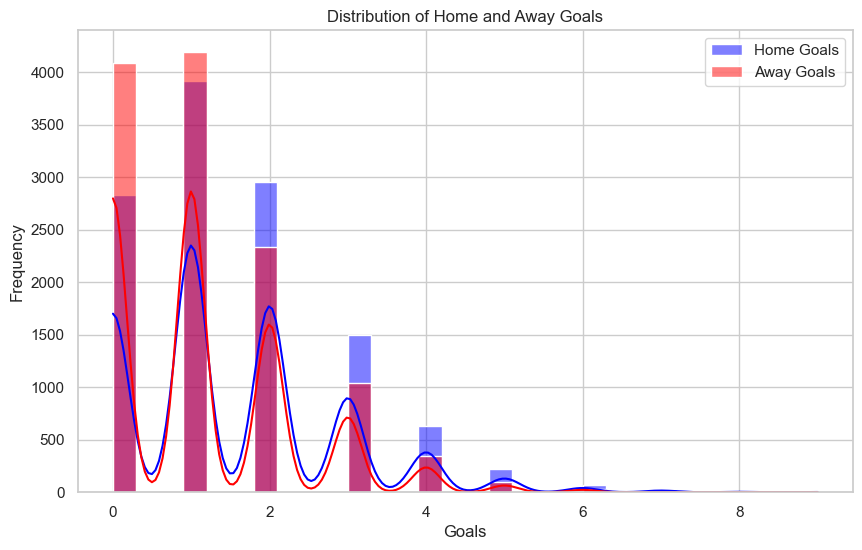

<Figure size 1200x800 with 0 Axes>

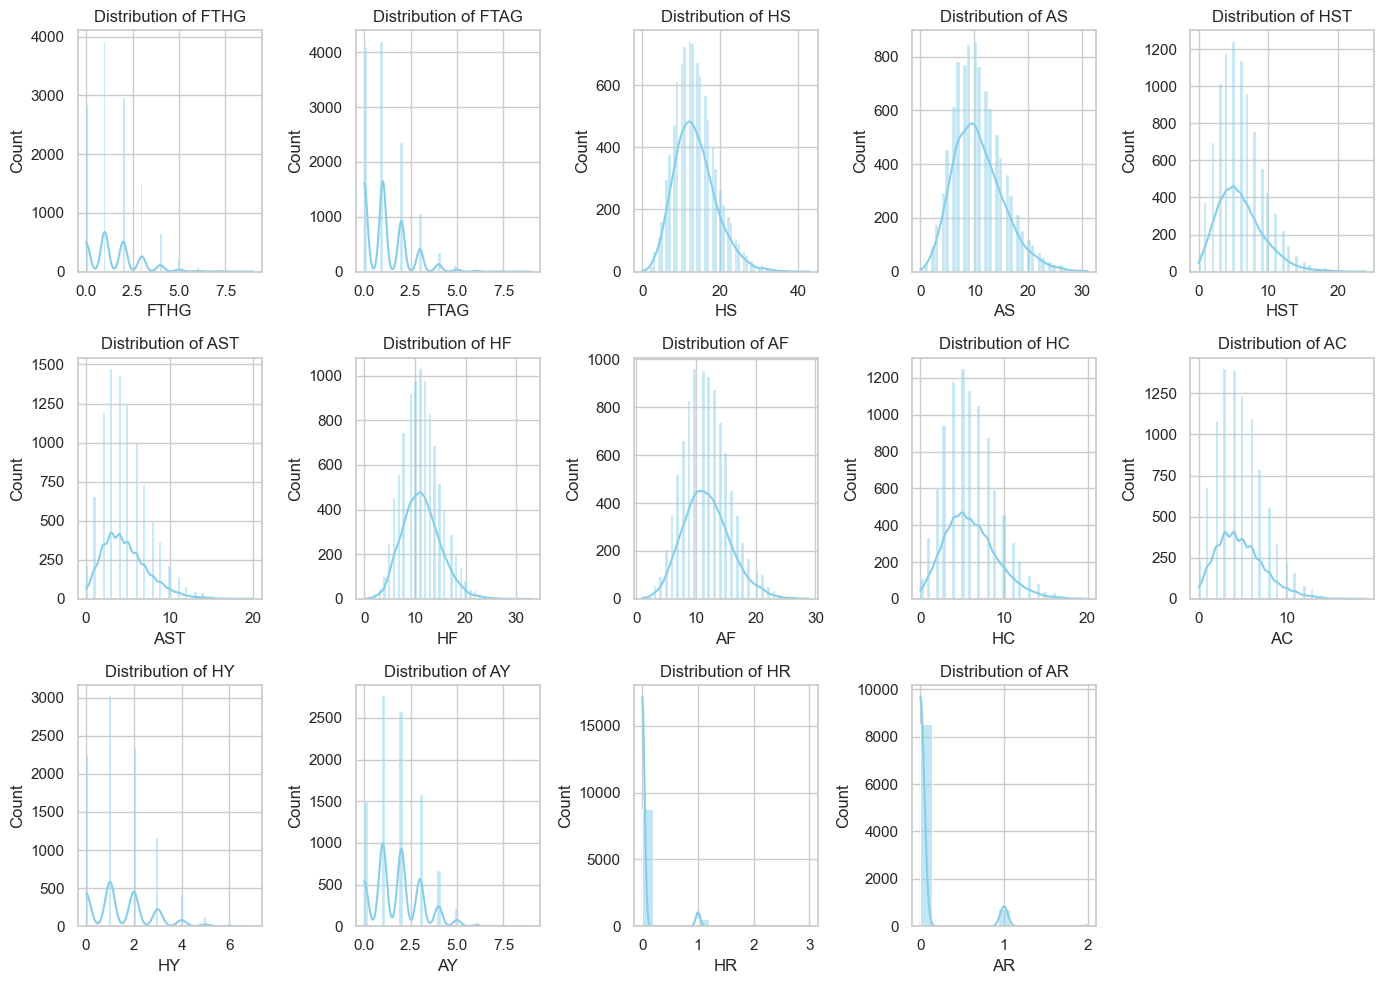

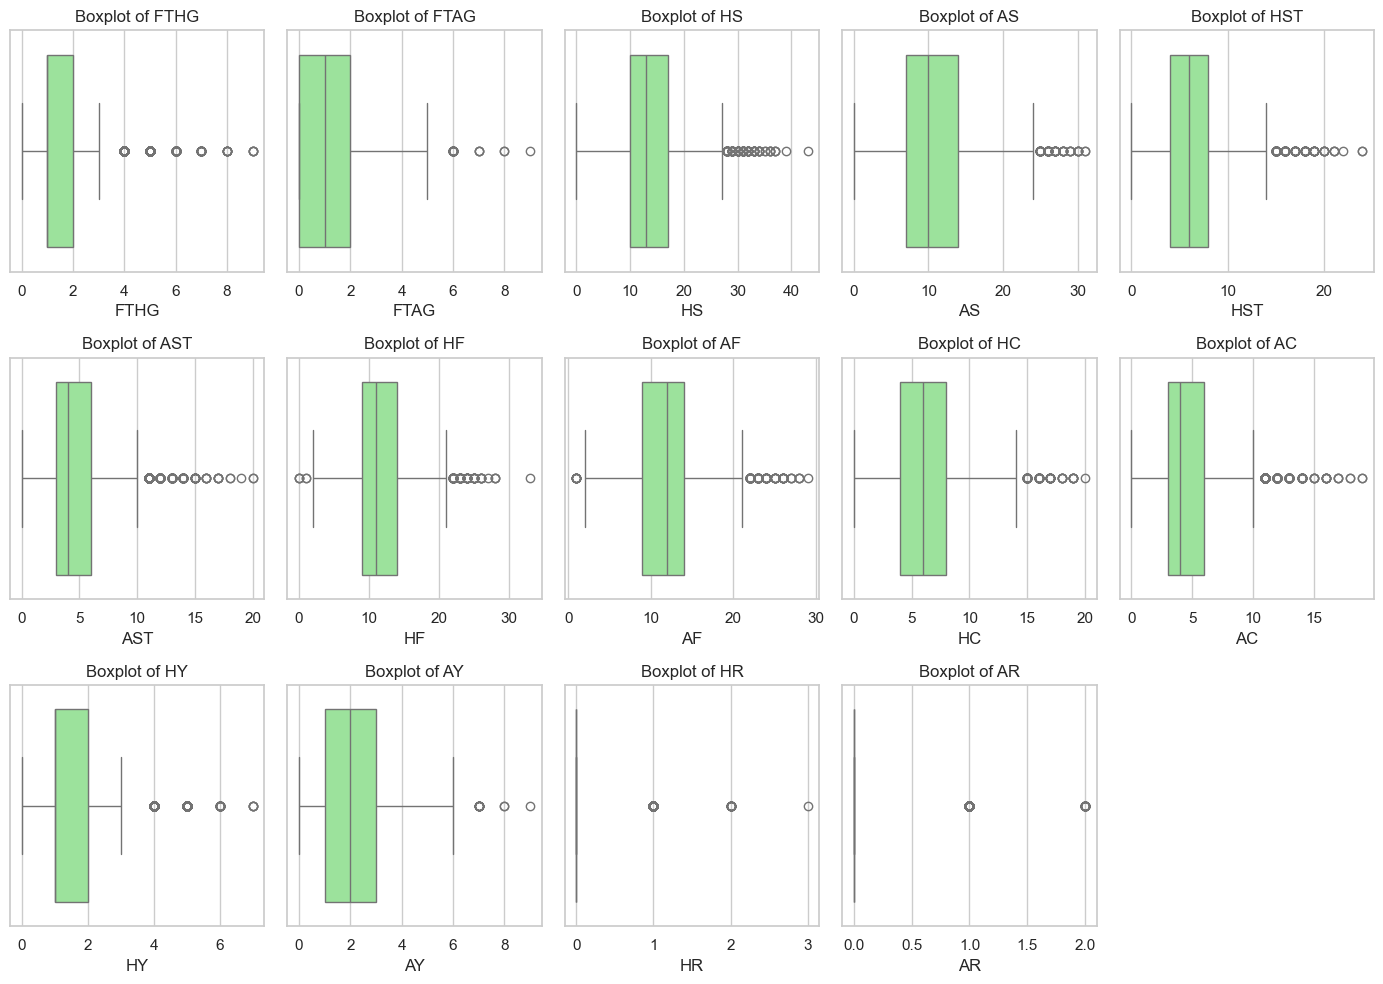

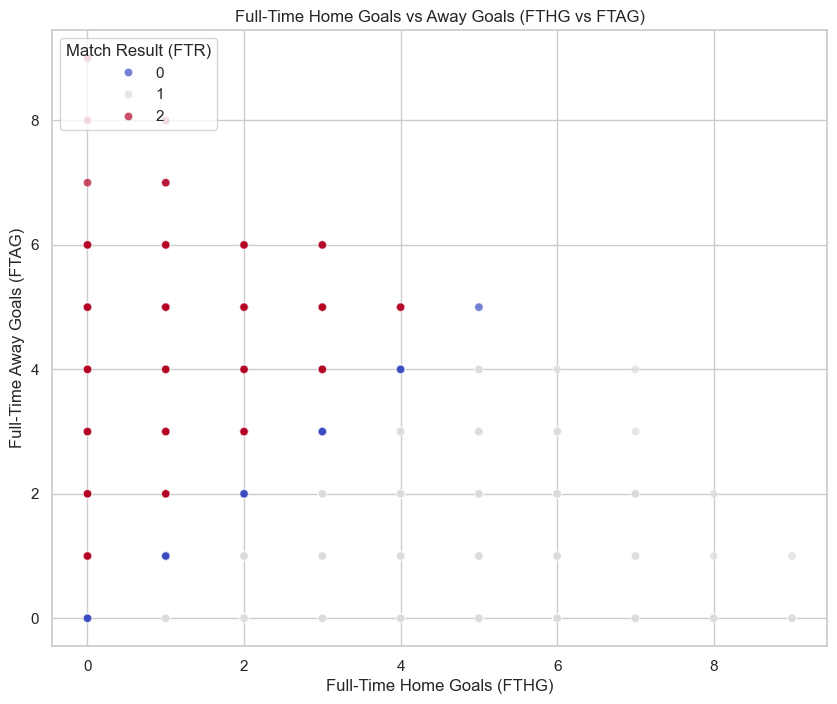

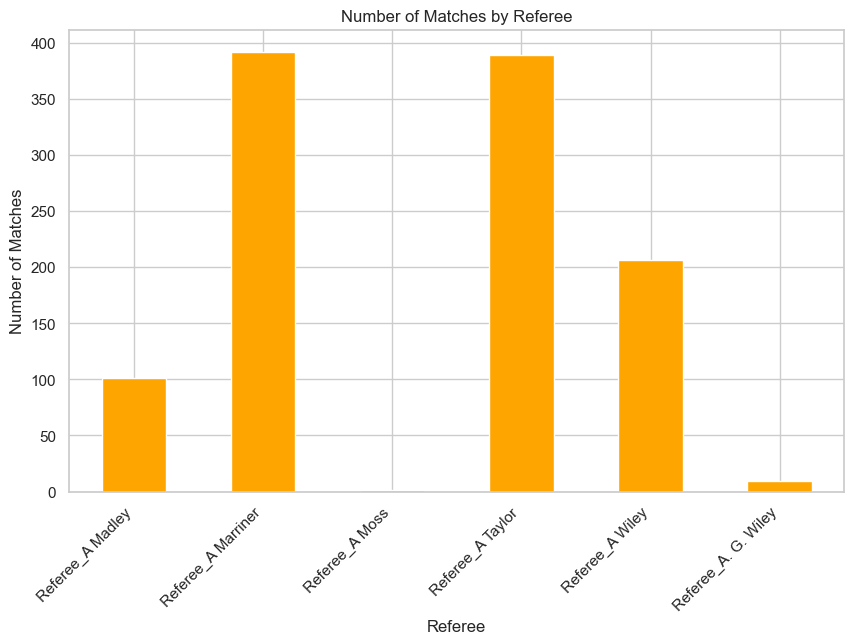

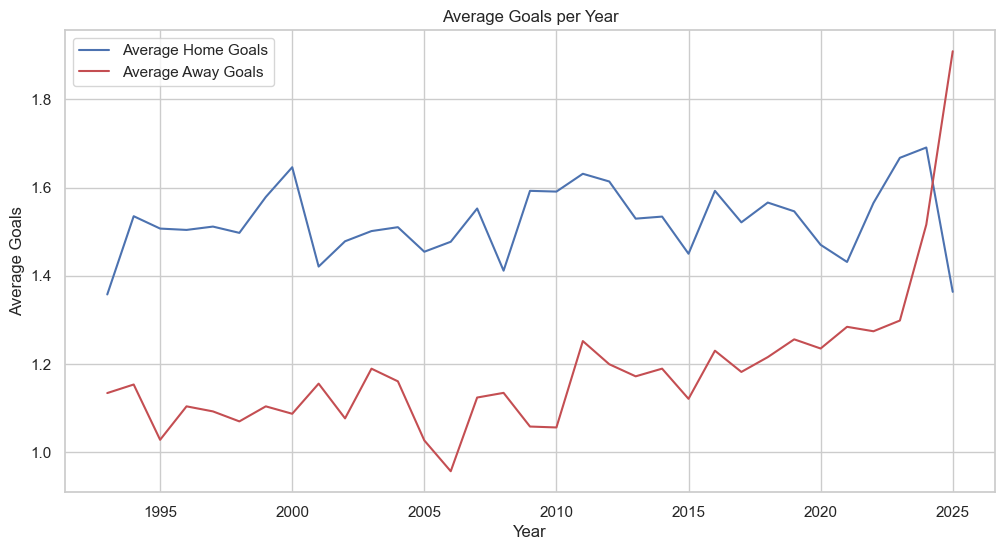

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Histogram for Numerical Columns (e.g., Goals scored in Home and Away)
plt.figure(figsize=(10, 6))
sns.histplot(eplcombined_data2['FTHG'], kde=True, color='blue', bins=30, label="Home Goals")
sns.histplot(eplcombined_data2['FTAG'], kde=True, color='red', bins=30, label="Away Goals")
plt.title('Distribution of Home and Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Assuming 'eplcombined_data2' is already loaded
# eplcombined_data2 = pd.read_csv('path_to_your_data.csv')  # Uncomment and provide the correct path if needed

# Convert 'Date' column to datetime format for analysis
eplcombined_data2['Date'] = pd.to_datetime(eplcombined_data2['Date'], format='%d-%m-%y')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# 1. Distribution of Key Numerical Features (Histograms)
numerical_features = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.histplot(eplcombined_data2[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

# 2. Boxplots to detect outliers in numerical columns
plt.figure(figsize=(14, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=eplcombined_data2[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

# 3. Scatterplots to explore relationships between key numerical features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=eplcombined_data2['FTHG'], y=eplcombined_data2['FTAG'], hue=eplcombined_data2['FTR'], palette='coolwarm', alpha=0.7)
plt.title('Full-Time Home Goals vs Away Goals (FTHG vs FTAG)')
plt.xlabel('Full-Time Home Goals (FTHG)')
plt.ylabel('Full-Time Away Goals (FTAG)')
plt.legend(title='Match Result (FTR)', loc='upper left')
plt.show()

# 5. Referee Analysis (Bar plots showing the frequency of referees)
referee_columns = ['Referee_A Madley', 'Referee_A Marriner', 'Referee_A Moss', 'Referee_A Taylor', 'Referee_A Wiley', 'Referee_A. G. Wiley']

# Count of matches for each referee
referee_count = eplcombined_data2[referee_columns].sum()

plt.figure(figsize=(10, 6))
referee_count.plot(kind='bar', color='orange')
plt.title('Number of Matches by Referee')
plt.xlabel('Referee')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Trend of goals over time (FTHG and FTAG)
plt.figure(figsize=(12, 6))
eplcombined_data2['Year'] = eplcombined_data2['Date'].dt.year
sns.lineplot(data=eplcombined_data2.groupby('Year')['FTHG'].mean(), label='Average Home Goals', color='b')
sns.lineplot(data=eplcombined_data2.groupby('Year')['FTAG'].mean(), label='Average Away Goals', color='r')
plt.title('Average Goals per Year')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.legend()
plt.show()


Focusing on the 2425 Season

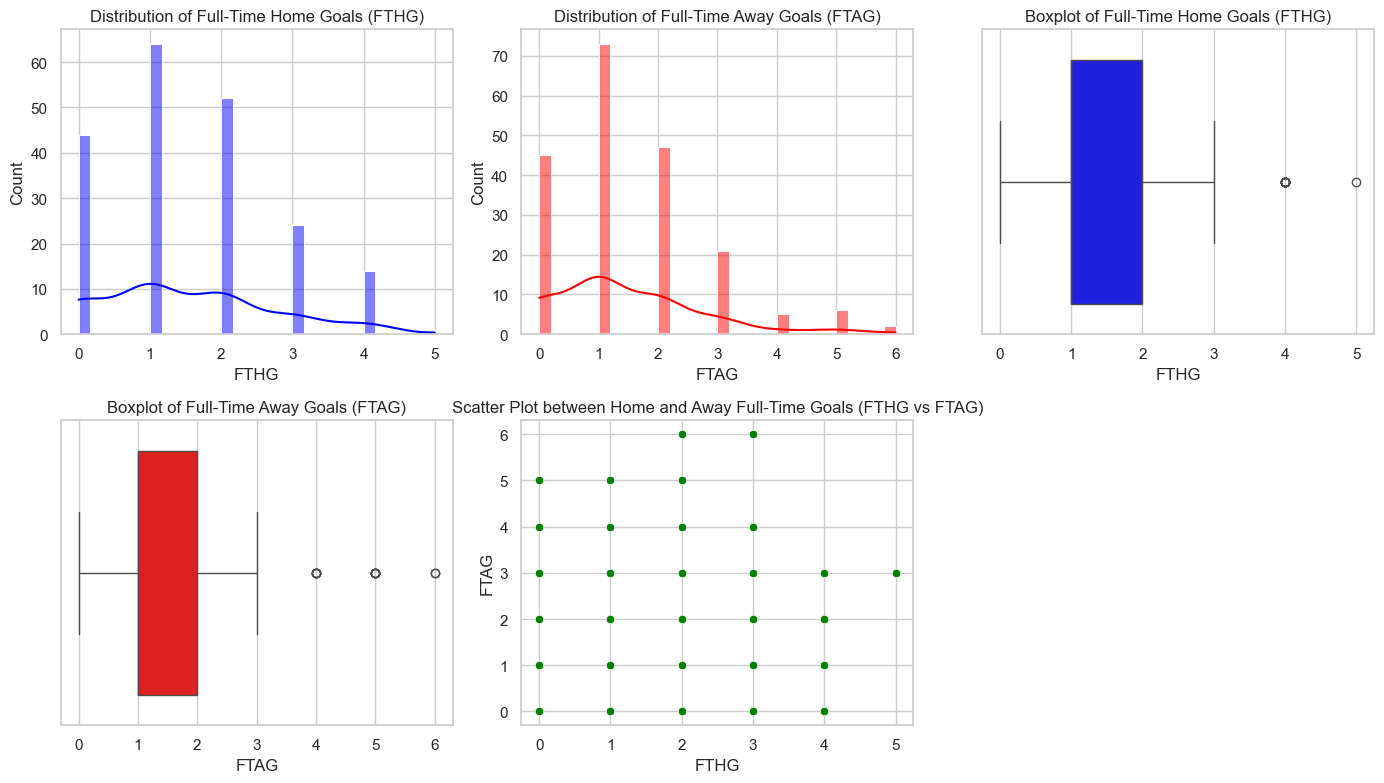

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the 2425 season
epl_2425 = eplcombined_data2[eplcombined_data2['Season'] == '2425']

# Visualizations for the 2425 Season
plt.figure(figsize=(14, 8))

# Histogram of Full-Time Home Goals (FTHG) distribution
plt.subplot(2, 3, 1)
sns.histplot(epl_2425['FTHG'], kde=True, color='blue', bins=30)
plt.title('Distribution of Full-Time Home Goals (FTHG)')

# Histogram of Full-Time Away Goals (FTAG) distribution
plt.subplot(2, 3, 2)
sns.histplot(epl_2425['FTAG'], kde=True, color='red', bins=30)
plt.title('Distribution of Full-Time Away Goals (FTAG)')

# Boxplot of Full-Time Home Goals (FTHG)
plt.subplot(2, 3, 3)
sns.boxplot(data=epl_2425, x='FTHG', color='blue')
plt.title('Boxplot of Full-Time Home Goals (FTHG)')

# Boxplot of Full-Time Away Goals (FTAG)
plt.subplot(2, 3, 4)
sns.boxplot(data=epl_2425, x='FTAG', color='red')
plt.title('Boxplot of Full-Time Away Goals (FTAG)')

# Scatter plot between Full-Time Home Goals and Away Goals
plt.subplot(2, 3, 5)
sns.scatterplot(x='FTHG', y='FTAG', data=epl_2425, color='green')
plt.title('Scatter Plot between Home and Away Full-Time Goals (FTHG vs FTAG)')

# Show all plots
plt.tight_layout()
plt.show()


## Team Standings and Performances

C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\2811007783.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2425['HomePoints'], epl_2425['AwayPoints'] = zip(*epl_2425.apply(lambda row: calculate_points(row), axis=1))
C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\2811007783.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2425['HomePoints'], epl_2425['AwayPoints'] = zip(*epl_2425.apply(lambda row: calculate_points(row), axis=1))
C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\28110077

              Team  Played  Wins  Home Wins  Away Wins  Draws  Losses  Points
11       Liverpool      19    14          7          7      4       1      46
15   Nott'm Forest      20    12          5          7      4       4      40
0          Arsenal      20    11          6          5      7       2      40
5          Chelsea      20    10          4          6      6       4      36
14       Newcastle      20    10          5          5      5       5      35
12        Man City      20    10          6          4      4       6      34
2      Bournemouth      20     9          5          4      6       5      33
1      Aston Villa      20     9          6          3      5       6      32
8           Fulham      20     7          4          3      9       4      30
4         Brighton      20     6          3          3     10       4      28
3        Brentford      20     8          7          1      3       9      27
17       Tottenham      20     7          4          3      3   

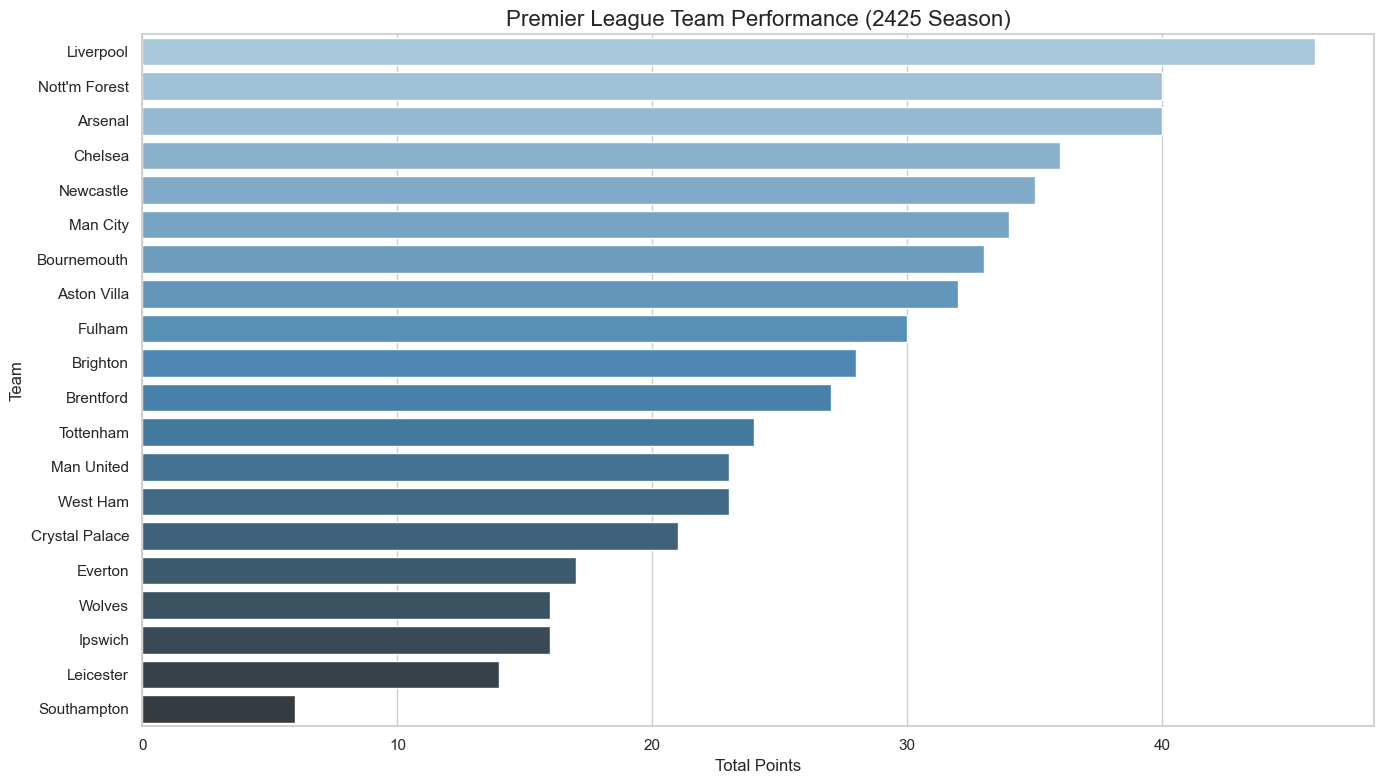

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the 2425 season
epl_2425 = eplcombined_data2[eplcombined_data2['Season'] == '2425']

# Function to calculate points for each match
def calculate_points(row):
    if row['FTR'] == 1:  # Home win
        return (3, 0)  # Home points, Away points
    elif row['FTR'] == 2:  # Away win
        return (0, 3)
    elif row['FTR'] == 0:  # Draw
        return (1, 1)
    return (0, 0)

# Apply the function to calculate points for Home and Away teams
epl_2425['HomePoints'], epl_2425['AwayPoints'] = zip(*epl_2425.apply(lambda row: calculate_points(row), axis=1))

# Calculate Home Wins, Home Draws, Home Losses, Away Wins, Away Draws, and Away Losses
epl_2425['HomeWins'] = epl_2425['FTR'].apply(lambda x: 1 if x == 1 else 0)
epl_2425['HomeDraws'] = epl_2425['FTR'].apply(lambda x: 1 if x == 0 else 0)
epl_2425['HomeLosses'] = epl_2425['FTR'].apply(lambda x: 1 if x == 2 else 0)

epl_2425['AwayWins'] = epl_2425['FTR'].apply(lambda x: 1 if x == 2 else 0)
epl_2425['AwayDraws'] = epl_2425['FTR'].apply(lambda x: 1 if x == 0 else 0)
epl_2425['AwayLosses'] = epl_2425['FTR'].apply(lambda x: 1 if x == 1 else 0)

# Aggregate the data by HomeTeam and AwayTeam to calculate total points, wins, losses, etc.
home_team_stats = epl_2425.groupby('HomeTeam').agg({
    'HomePoints': 'sum',
    'HomeWins': 'sum',
    'HomeDraws': 'sum',
    'HomeLosses': 'sum'}).reset_index()

away_team_stats = epl_2425.groupby('AwayTeam').agg({
    'AwayPoints': 'sum',
    'AwayWins': 'sum',
    'AwayDraws': 'sum',
    'AwayLosses': 'sum'}).reset_index()

# Merge home and away stats to create total standings
team_stats = pd.merge(home_team_stats, away_team_stats, 
                       left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Calculate total points, wins, losses, etc.
team_stats['TotalPoints'] = team_stats['HomePoints'] + team_stats['AwayPoints']
team_stats['TotalWins'] = team_stats['HomeWins'] + team_stats['AwayWins']
team_stats['TotalDraws'] = team_stats['HomeDraws'] + team_stats['AwayDraws']
team_stats['TotalLosses'] = team_stats['HomeLosses'] + team_stats['AwayLosses']
team_stats['PlayedMatches'] = team_stats['TotalWins'] + team_stats['TotalDraws'] + team_stats['TotalLosses']

# Sort by Total Points and Total Wins
team_stats = team_stats.sort_values(by=['TotalPoints', 'TotalWins'], ascending=[False, False])

# Keep only necessary columns for the table
team_stats = team_stats[['HomeTeam', 'PlayedMatches', 'TotalWins', 'HomeWins', 'AwayWins', 'TotalDraws', 'TotalLosses', 'TotalPoints']]
team_stats.columns = ['Team', 'Played', 'Wins', 'Home Wins', 'Away Wins', 'Draws', 'Losses', 'Points']

# Display the Premier League standings for the 2425 season
print(team_stats)

# Visualization for Team Performance (Points)
plt.figure(figsize=(14, 8))

# Bar plot for Total Points
sns.barplot(x='Points', y='Team', data=team_stats, palette='Blues_d')
plt.title('Premier League Team Performance (2425 Season)', fontsize=16)
plt.xlabel('Total Points', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.tight_layout()
plt.show()


Notice that some teams are ranked without consideration of Goal Difference. This is because the Total Points are the same for those teams. To break the tie, we can consider the Goal Difference (GD) as the next criterion for ranking the teams.

C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\774021924.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2425['HomePoints'], epl_2425['AwayPoints'] = zip(*epl_2425.apply(lambda row: calculate_points(row), axis=1))
C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\774021924.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2425['HomePoints'], epl_2425['AwayPoints'] = zip(*epl_2425.apply(lambda row: calculate_points(row), axis=1))
C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\774021924.

              Team  Played  Wins  Home Wins  Away Wins  Draws  Losses  Points  \
11       Liverpool      19    14          7          7      4       1      46   
0          Arsenal      20    11          6          5      7       2      40   
15   Nott'm Forest      20    12          5          7      4       4      40   
5          Chelsea      20    10          4          6      6       4      36   
14       Newcastle      20    10          5          5      5       5      35   
12        Man City      20    10          6          4      4       6      34   
2      Bournemouth      20     9          5          4      6       5      33   
1      Aston Villa      20     9          6          3      5       6      32   
8           Fulham      20     7          4          3      9       4      30   
4         Brighton      20     6          3          3     10       4      28   
3        Brentford      20     8          7          1      3       9      27   
17       Tottenham      20  

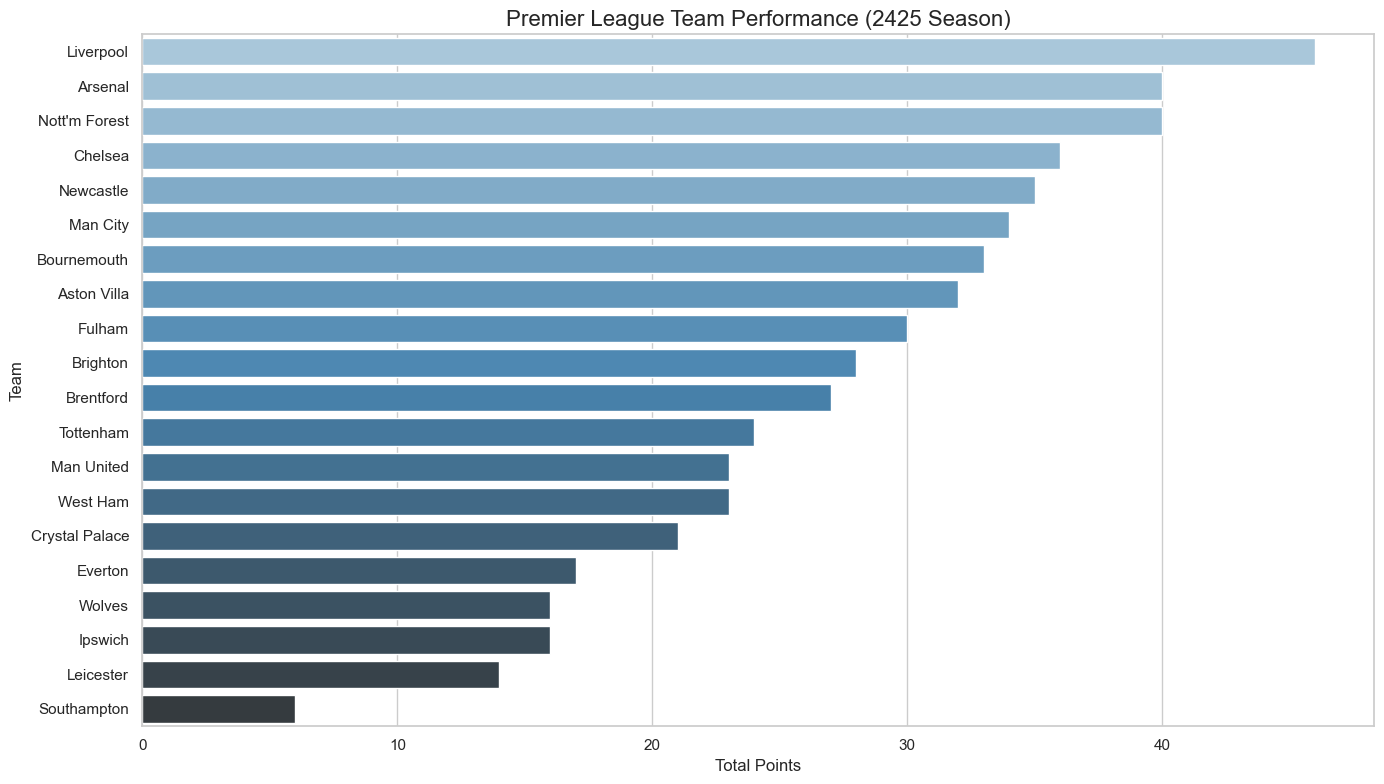

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the 2425 season
epl_2425 = eplcombined_data2[eplcombined_data2['Season'] == '2425']

# Function to calculate points for each match
def calculate_points(row):
    if row['FTR'] == 1:  # Home win
        return (3, 0)  # Home points, Away points
    elif row['FTR'] == 2:  # Away win
        return (0, 3)
    elif row['FTR'] == 0:  # Draw
        return (1, 1)
    return (0, 0)

# Apply the function to calculate points for Home and Away teams
epl_2425['HomePoints'], epl_2425['AwayPoints'] = zip(*epl_2425.apply(lambda row: calculate_points(row), axis=1))

# Calculate Home Wins, Home Draws, Home Losses, Away Wins, Away Draws, and Away Losses
epl_2425['HomeWins'] = epl_2425['FTR'].apply(lambda x: 1 if x == 1 else 0)
epl_2425['HomeDraws'] = epl_2425['FTR'].apply(lambda x: 1 if x == 0 else 0)
epl_2425['HomeLosses'] = epl_2425['FTR'].apply(lambda x: 1 if x == 2 else 0)

epl_2425['AwayWins'] = epl_2425['FTR'].apply(lambda x: 1 if x == 2 else 0)
epl_2425['AwayDraws'] = epl_2425['FTR'].apply(lambda x: 1 if x == 0 else 0)
epl_2425['AwayLosses'] = epl_2425['FTR'].apply(lambda x: 1 if x == 1 else 0)

# Add Goals Scored and Goals Scored Against for Home and Away
epl_2425['HomeGoalsScored'] = epl_2425['FTHG']
epl_2425['HomeGoalsAgainst'] = epl_2425['FTAG']
epl_2425['AwayGoalsScored'] = epl_2425['FTAG']
epl_2425['AwayGoalsAgainst'] = epl_2425['FTHG']

# Calculate Goal Difference (GS - GSA)
epl_2425['HomeGoalDifference'] = epl_2425['HomeGoalsScored'] - epl_2425['HomeGoalsAgainst']
epl_2425['AwayGoalDifference'] = epl_2425['AwayGoalsScored'] - epl_2425['AwayGoalsAgainst']

# Calculate the GS:GSA ratio
epl_2425['HomeGSRatio'] = epl_2425['HomeGoalsScored'].astype(str) + ':' + epl_2425['HomeGoalsAgainst'].astype(str)
epl_2425['AwayGSRatio'] = epl_2425['AwayGoalsScored'].astype(str) + ':' + epl_2425['AwayGoalsAgainst'].astype(str)

# Aggregate the data by HomeTeam and AwayTeam to calculate total goals, points, wins, losses, etc.
home_team_stats = epl_2425.groupby('HomeTeam').agg({
    'HomePoints': 'sum',
    'HomeWins': 'sum',
    'HomeDraws': 'sum',
    'HomeLosses': 'sum',
    'HomeGoalsScored': 'sum',
    'HomeGoalsAgainst': 'sum',
    'HomeGoalDifference': 'sum'}).reset_index()

away_team_stats = epl_2425.groupby('AwayTeam').agg({
    'AwayPoints': 'sum',
    'AwayWins': 'sum',
    'AwayDraws': 'sum',
    'AwayLosses': 'sum',
    'AwayGoalsScored': 'sum',
    'AwayGoalsAgainst': 'sum',
    'AwayGoalDifference': 'sum'}).reset_index()

# Merge home and away stats to create total standings
team_stats = pd.merge(home_team_stats, away_team_stats, 
                       left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Calculate total points, wins, losses, goals, etc.
team_stats['TotalPoints'] = team_stats['HomePoints'] + team_stats['AwayPoints']
team_stats['TotalWins'] = team_stats['HomeWins'] + team_stats['AwayWins']
team_stats['TotalDraws'] = team_stats['HomeDraws'] + team_stats['AwayDraws']
team_stats['TotalLosses'] = team_stats['HomeLosses'] + team_stats['AwayLosses']
team_stats['TotalGoalsScored'] = team_stats['HomeGoalsScored'] + team_stats['AwayGoalsScored']
team_stats['TotalGoalsAgainst'] = team_stats['HomeGoalsAgainst'] + team_stats['AwayGoalsAgainst']
team_stats['TotalGoalDifference'] = team_stats['HomeGoalDifference'] + team_stats['AwayGoalDifference']
team_stats['PlayedMatches'] = team_stats['TotalWins'] + team_stats['TotalDraws'] + team_stats['TotalLosses']

# Sort by Total Points and Total Goal Difference
team_stats = team_stats.sort_values(by=['TotalPoints', 'TotalGoalDifference', 'TotalWins'], ascending=[False, False, False])

# Calculate GS:GSA Ratio for the total season
team_stats['GD'] = team_stats['TotalGoalsScored'].astype(str) + ':' + team_stats['TotalGoalsAgainst'].astype(str)

# Keep only necessary columns for the table
team_stats = team_stats[['HomeTeam', 'PlayedMatches', 'TotalWins', 'HomeWins', 'AwayWins', 'TotalDraws', 'TotalLosses', 'TotalPoints', 'TotalGoalsScored', 'TotalGoalsAgainst', 'TotalGoalDifference', 'GD']]
team_stats.columns = ['Team', 'Played', 'Wins', 'Home Wins', 'Away Wins', 'Draws', 'Losses', 'Points', 'Goals Scored', 'Goals Against', 'Goal Difference', 'GD']

# Display the Premier League standings for the 2425 season
print(team_stats)

# Visualization for Team Performance (Points)
plt.figure(figsize=(14, 8))

# Bar plot for Total Points
sns.barplot(x='Points', y='Team', data=team_stats, palette='Blues_d')
plt.title('Premier League Team Performance (2425 Season)', fontsize=16)
plt.xlabel('Total Points', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.tight_layout()
plt.show()


## Team Performance for 2324 Season

C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\584096486.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2324.loc[:, 'HomePoints'], epl_2324.loc[:, 'AwayPoints'] = zip(*epl_2324.apply(lambda row: calculate_points_2324(row), axis=1))
C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\584096486.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2324.loc[:, 'HomePoints'], epl_2324.loc[:, 'AwayPoints'] = zip(*epl_2324.apply(lambda row: calculate_points_2324(row), axis=1))
C:\Users\DALEI\AppData

                Team  Played  Wins  Home Wins  Away Wins  Draws  Losses  \
12          Man City      38    28         14         14      7       3   
0            Arsenal      38    28         15         13      5       5   
10         Liverpool      38    24         15          9     10       4   
1        Aston Villa      38    20         12          8      8      10   
17         Tottenham      38    20         13          7      6      12   
6            Chelsea      38    18         11          7      9      11   
14         Newcastle      38    18         12          6      6      14   
13        Man United      38    18         10          8      6      14   
18          West Ham      38    14          7          7     10      14   
7     Crystal Palace      38    13          8          5     10      15   
4           Brighton      38    12          8          4     12      14   
8            Everton      38    13          8          5      9      16   
2        Bournemouth     

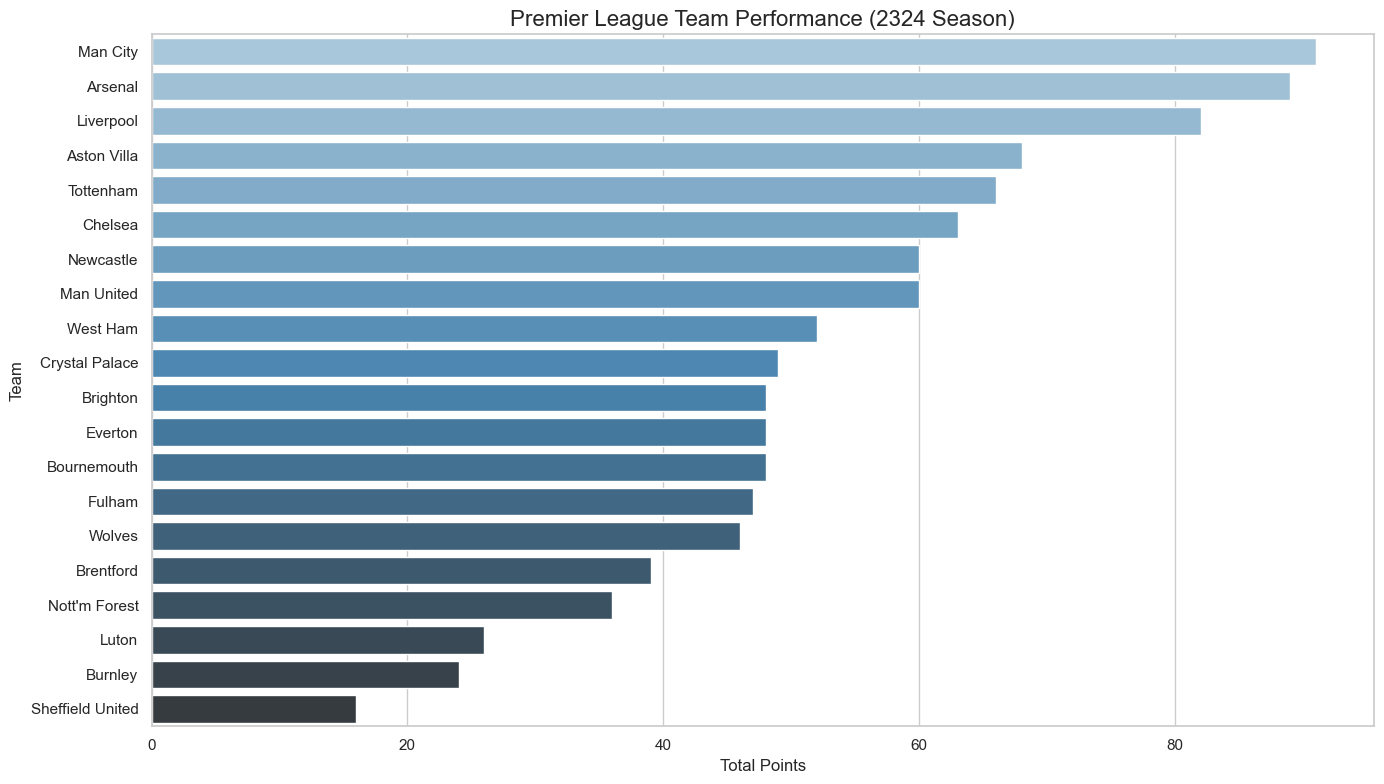

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the 2324 season
epl_2324 = eplcombined_data2[eplcombined_data2['Season'] == '2324']

# Function to calculate points for each match
def calculate_points_2324(row):
    if row['FTR'] == 1:  # Home win
        return (3, 0)  # Home points, Away points
    elif row['FTR'] == 2:  # Away win
        return (0, 3)
    elif row['FTR'] == 0:  # Draw
        return (1, 1)
    return (0, 0)

# Apply the function to calculate points for Home and Away teams for 2324
epl_2324.loc[:, 'HomePoints'], epl_2324.loc[:, 'AwayPoints'] = zip(*epl_2324.apply(lambda row: calculate_points_2324(row), axis=1))

# Calculate Home Wins, Home Draws, Home Losses, Away Wins, Away Draws, and Away Losses for 2324
epl_2324.loc[:, 'HomeWins'] = epl_2324['FTR'].apply(lambda x: 1 if x == 1 else 0)
epl_2324.loc[:, 'HomeDraws'] = epl_2324['FTR'].apply(lambda x: 1 if x == 0 else 0)
epl_2324.loc[:, 'HomeLosses'] = epl_2324['FTR'].apply(lambda x: 1 if x == 2 else 0)

epl_2324.loc[:, 'AwayWins'] = epl_2324['FTR'].apply(lambda x: 1 if x == 2 else 0)
epl_2324.loc[:, 'AwayDraws'] = epl_2324['FTR'].apply(lambda x: 1 if x == 0 else 0)
epl_2324.loc[:, 'AwayLosses'] = epl_2324['FTR'].apply(lambda x: 1 if x == 1 else 0)

# Add Goals Scored and Goals Scored Against for Home and Away for 2324
epl_2324.loc[:, 'HomeGoalsScored'] = epl_2324['FTHG']
epl_2324.loc[:, 'HomeGoalsAgainst'] = epl_2324['FTAG']
epl_2324.loc[:, 'AwayGoalsScored'] = epl_2324['FTAG']
epl_2324.loc[:, 'AwayGoalsAgainst'] = epl_2324['FTHG']

# Calculate Goal Difference (GS - GSA) for 2324
epl_2324.loc[:, 'HomeGoalDifference'] = epl_2324['HomeGoalsScored'] - epl_2324['HomeGoalsAgainst']
epl_2324.loc[:, 'AwayGoalDifference'] = epl_2324['AwayGoalsScored'] - epl_2324['AwayGoalsAgainst']

# Calculate the GS:GSA ratio for 2324
epl_2324.loc[:, 'HomeGSRatio'] = epl_2324['HomeGoalsScored'].astype(str) + ':' + epl_2324['HomeGoalsAgainst'].astype(str)
epl_2324.loc[:, 'AwayGSRatio'] = epl_2324['AwayGoalsScored'].astype(str) + ':' + epl_2324['AwayGoalsAgainst'].astype(str)

# Aggregate the data by HomeTeam and AwayTeam to calculate total goals, points, wins, losses, etc. for 2324
home_team_stats_2324 = epl_2324.groupby('HomeTeam').agg({
    'HomePoints': 'sum',
    'HomeWins': 'sum',
    'HomeDraws': 'sum',
    'HomeLosses': 'sum',
    'HomeGoalsScored': 'sum',
    'HomeGoalsAgainst': 'sum',
    'HomeGoalDifference': 'sum'}).reset_index()

away_team_stats_2324 = epl_2324.groupby('AwayTeam').agg({
    'AwayPoints': 'sum',
    'AwayWins': 'sum',
    'AwayDraws': 'sum',
    'AwayLosses': 'sum',
    'AwayGoalsScored': 'sum',
    'AwayGoalsAgainst': 'sum',
    'AwayGoalDifference': 'sum'}).reset_index()

# Merge home and away stats to create total standings for 2324
team_stats_2324 = pd.merge(home_team_stats_2324, away_team_stats_2324, 
                            left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Calculate total points, wins, losses, goals, etc. for 2324
team_stats_2324['TotalPoints'] = team_stats_2324['HomePoints'] + team_stats_2324['AwayPoints']
team_stats_2324['TotalWins'] = team_stats_2324['HomeWins'] + team_stats_2324['AwayWins']
team_stats_2324['TotalDraws'] = team_stats_2324['HomeDraws'] + team_stats_2324['AwayDraws']
team_stats_2324['TotalLosses'] = team_stats_2324['HomeLosses'] + team_stats_2324['AwayLosses']
team_stats_2324['TotalGoalsScored'] = team_stats_2324['HomeGoalsScored'] + team_stats_2324['AwayGoalsScored']
team_stats_2324['TotalGoalsAgainst'] = team_stats_2324['HomeGoalsAgainst'] + team_stats_2324['AwayGoalsAgainst']
team_stats_2324['TotalGoalDifference'] = team_stats_2324['HomeGoalDifference'] + team_stats_2324['AwayGoalDifference']
team_stats_2324['PlayedMatches'] = team_stats_2324['TotalWins'] + team_stats_2324['TotalDraws'] + team_stats_2324['TotalLosses']

# Sort by Total Points and Total Goal Difference for 2324
team_stats_2324 = team_stats_2324.sort_values(by=['TotalPoints', 'TotalGoalDifference', 'TotalWins'], ascending=[False, False, False])

# Calculate GS:GSA Ratio for the total season for 2324
team_stats_2324['GS:GSA'] = team_stats_2324['TotalGoalsScored'].astype(str) + ':' + team_stats_2324['TotalGoalsAgainst'].astype(str)

# Keep only necessary columns for the table for 2324
team_stats_2324 = team_stats_2324[['HomeTeam', 'PlayedMatches', 'TotalWins', 'HomeWins', 'AwayWins', 'TotalDraws', 'TotalLosses', 'TotalPoints', 'TotalGoalsScored', 'TotalGoalsAgainst', 'TotalGoalDifference', 'GS:GSA']]
team_stats_2324.columns = ['Team', 'Played', 'Wins', 'Home Wins', 'Away Wins', 'Draws', 'Losses', 'Points', 'Goals Scored', 'Goals Against', 'Goal Difference', 'GS:GSA']

# Display the Premier League standings for the 2324 season
print(team_stats_2324)

# Visualization for Team Performance (Points) for 2324
plt.figure(figsize=(14, 8))

# Bar plot for Total Points for 2324
sns.barplot(x='Points', y='Team', data=team_stats_2324, palette='Blues_d')
plt.title('Premier League Team Performance (2324 Season)', fontsize=16)
plt.xlabel('Total Points', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.tight_layout()
plt.show()


## Form

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assume 'team_name' is the team you're interested in
liverpool_2425_home = epl_2425[epl_2425['HomeTeam'] == 'Liverpool']
liverpool_2425_away = epl_2425[epl_2425['AwayTeam'] == 'Liverpool']

# Filter the data for the 2425 season and the specific team
epl_2425_team = liverpool_2425_home & liverpool_2425_away

# Sort the data by Date (descending) to get the most recent matches
epl_2425_team_sorted = epl_2425_team.sort_values(by='Date', ascending=False)

# Select the most recent 10 matches
last_10_matches = epl_2425_team_sorted.head(10)

# Determine the outcome of each match
def match_outcome(row):
    # If the team is the home team, check the home match result
    if row['HomeTeam'] == epl_2425_team:
        if row['FTR'] == 1:  # Home win
            return 'Win'
        elif row['FTR'] == 0:  # Draw
            return 'Draw'
        else:  # Home loss
            return 'Loss'
    # If the team is the away team, check the away match result
    elif row['AwayTeam'] == epl_2425_team:
        if row['FTR'] == 2:  # Away win
            return 'Win'
        elif row['FTR'] == 0:  # Draw
            return 'Draw'
        else:  # Away loss
            return 'Loss'

# Apply the function to determine the outcome
last_10_matches['Outcome'] = last_10_matches.apply(lambda row: match_outcome(row), axis=1)

# Map the colors based on the outcome
color_map = {'Win': 'green', 'Draw': 'grey', 'Loss': 'red'}
last_10_matches['Color'] = last_10_matches['Outcome'].map(color_map)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=last_10_matches.index, y=[1]*len(last_10_matches), palette=last_10_matches['Color'], dodge=False)

# Customize the plot
plt.title(f"Last 10 Matches of {team_name} (2425 Season)", fontsize=16)
plt.xlabel('Match Number', fontsize=12)
plt.yticks([])
plt.xticks(range(10), [f"Match {i+1}" for i in range(10)], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for &: 'DatetimeArray' and 'DatetimeArray'

## Profiling Liverpool FC

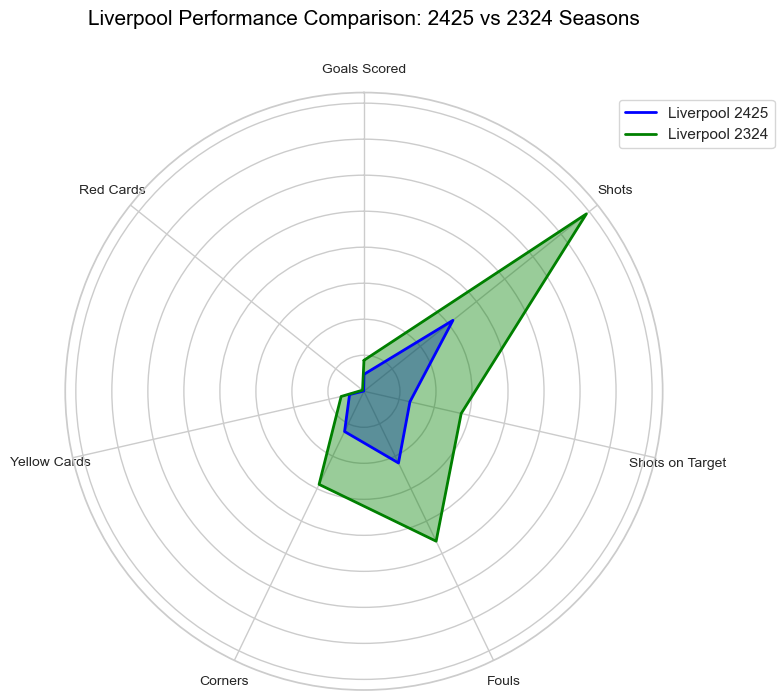

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Extract data for Liverpool in 2425 and 2324 seasons (both home and away)
liverpool_2425_home = epl_2425[epl_2425['HomeTeam'] == 'Liverpool']
liverpool_2425_away = epl_2425[epl_2425['AwayTeam'] == 'Liverpool']

liverpool_2324_home = epl_2324[epl_2324['HomeTeam'] == 'Liverpool']
liverpool_2324_away = epl_2324[epl_2324['AwayTeam'] == 'Liverpool']

# Function to calculate stats for a season
def calculate_team_stats(season_data_home, season_data_away):
    stats_home = {
        'Goals Scored': season_data_home['FTHG'].sum(),
        'Shots': season_data_home['HS'].sum(),
        'Shots on Target': season_data_home['HST'].sum(),
        'Fouls': season_data_home['HF'].sum(),
        'Corners': season_data_home['HC'].sum(),
        'Yellow Cards': season_data_home['HY'].sum(),
        'Red Cards': season_data_home['HR'].sum(),
    }
    
    stats_away = {
        'Goals Scored': season_data_away['FTAG'].sum(),
        'Shots': season_data_away['AS'].sum(),
        'Shots on Target': season_data_away['AST'].sum(),
        'Fouls': season_data_away['AF'].sum(),
        'Corners': season_data_away['AC'].sum(),
        'Yellow Cards': season_data_away['AY'].sum(),
        'Red Cards': season_data_away['AR'].sum(),
    }

    # Combine home and away stats for the full season
    stats = {key: stats_home[key] + stats_away[key] for key in stats_home}
    
    return stats, stats_home, stats_away

# Calculate Liverpool's stats for both seasons (2425 and 2324)
stats_2425, home_2425, away_2425 = calculate_team_stats(liverpool_2425_home, liverpool_2425_away)
stats_2324, home_2324, away_2324 = calculate_team_stats(liverpool_2324_home, liverpool_2324_away)

# Prepare the data for radar chart
categories = list(stats_2425.keys())
values_2425 = list(stats_2425.values())
values_2324 = list(stats_2324.values())

# Normalize values if necessary (optional, depending on the scale of the values)
# For simplicity, we assume the data is already comparable

# Radar chart setup
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
values_2425 += values_2425[:1]  # Close the circle
values_2324 += values_2324[:1]  # Close the circle
angles += angles[:1]  # Close the circle

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Plot Liverpool's 2425 season data
ax.plot(angles, values_2425, linewidth=2, linestyle='solid', label='Liverpool 2425', color='blue')
ax.fill(angles, values_2425, alpha=0.4, color='blue')

# Plot Liverpool's 2324 season data
ax.plot(angles, values_2324, linewidth=2, linestyle='solid', label='Liverpool 2324', color='green')
ax.fill(angles, values_2324, alpha=0.4, color='green')

# Add labels and title
ax.set_yticklabels([])  # Remove radial ticks
ax.set_xticks(angles[:-1])  # Set the category labels
ax.set_xticklabels(categories, fontsize=10)

plt.title('Liverpool Performance Comparison: 2425 vs 2324 Seasons', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


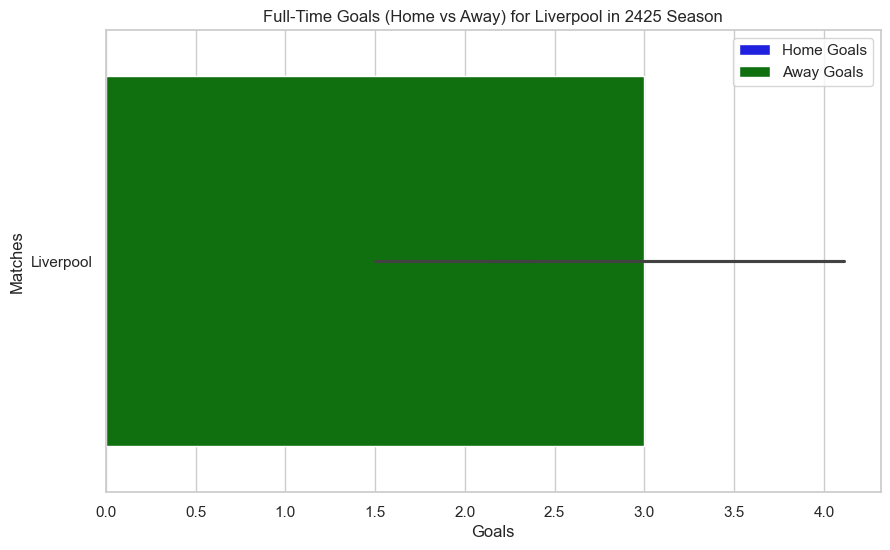

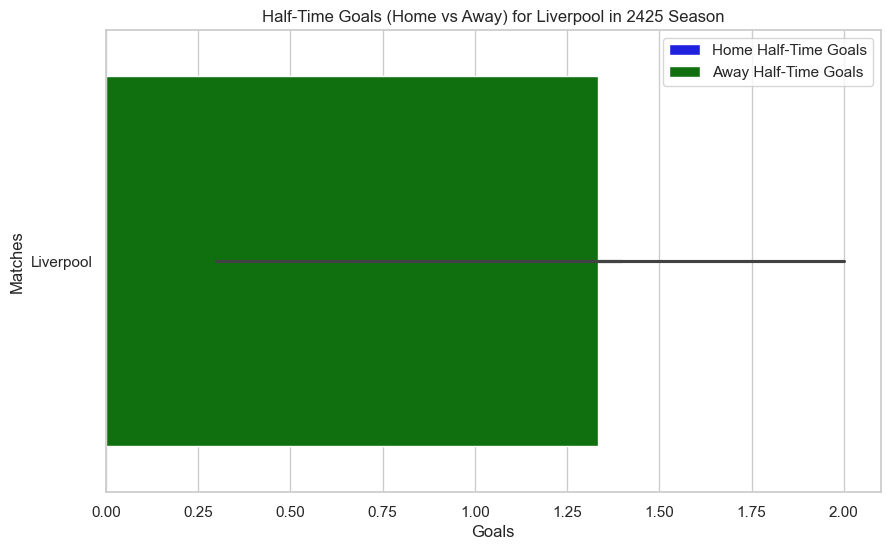

C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\2643679307.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FTR', data=liverpool_matches, palette='Blues')
C:\Users\DALEI\AppData\Local\Temp\ipykernel_24312\2643679307.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='FTR', data=liverpool_matches, palette='Blues')


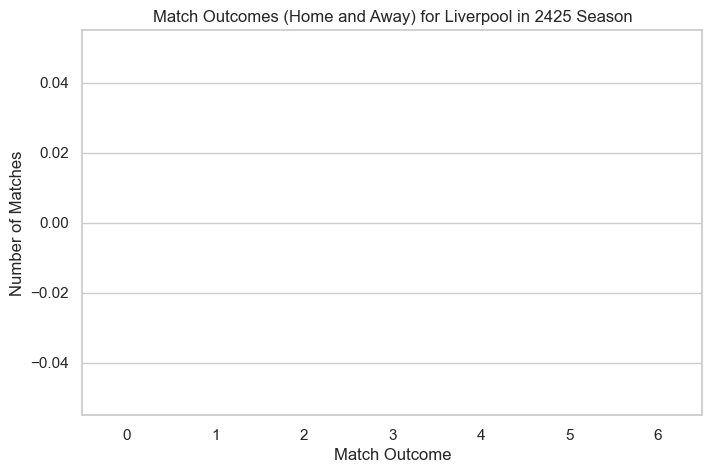

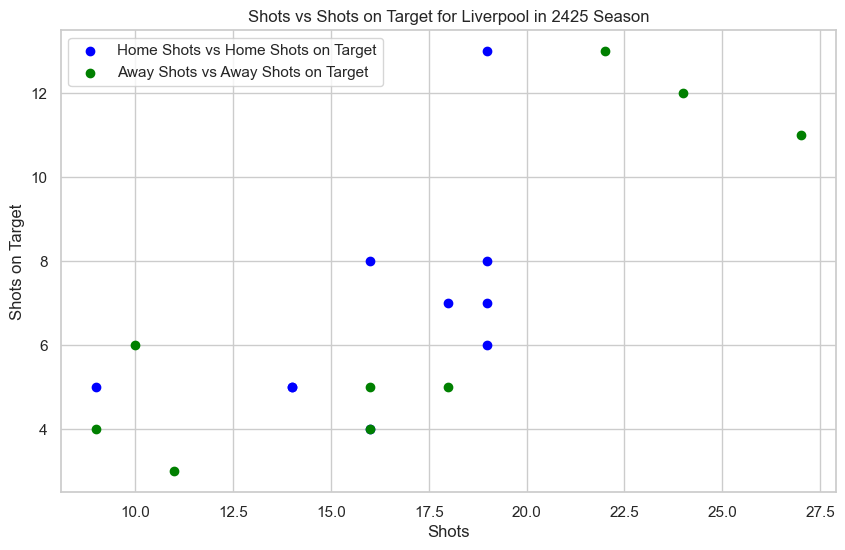

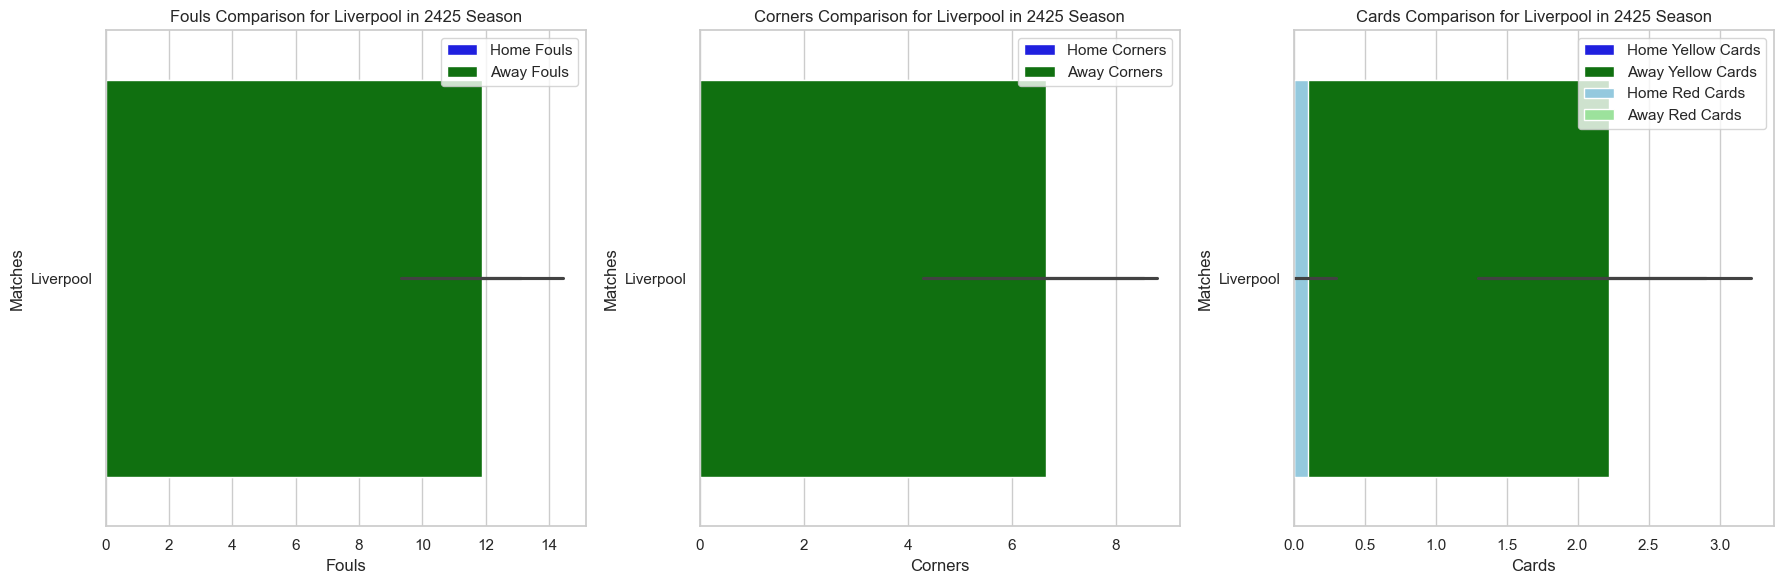

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for Liverpool's matches (both home and away)
liverpool_home = epl_2425[epl_2425['HomeTeam'] == 'Liverpool']
liverpool_away = epl_2425[epl_2425['AwayTeam'] == 'Liverpool']

# Combine the home and away matches for Liverpool
liverpool_matches = pd.concat([liverpool_home, liverpool_away])

# Plotting Full-Time Goals (FTHG and FTAG)
plt.figure(figsize=(10, 6))
sns.barplot(x='FTHG', y='HomeTeam', data=liverpool_home, color='blue', label='Home Goals')
sns.barplot(x='FTAG', y='AwayTeam', data=liverpool_away, color='green', label='Away Goals')
plt.title('Full-Time Goals (Home vs Away) for Liverpool in 2425 Season')
plt.xlabel('Goals')
plt.ylabel('Matches')
plt.legend()
plt.show()

# Plotting Half-Time Goals (HTHG and HTAG)
plt.figure(figsize=(10, 6))
sns.barplot(x='HTHG', y='HomeTeam', data=liverpool_home, color='blue', label='Home Half-Time Goals')
sns.barplot(x='HTAG', y='AwayTeam', data=liverpool_away, color='green', label='Away Half-Time Goals')
plt.title('Half-Time Goals (Home vs Away) for Liverpool in 2425 Season')
plt.xlabel('Goals')
plt.ylabel('Matches')
plt.legend()
plt.show()

# Plotting Full-Time Result (Match Outcome Analysis)
liverpool_matches['FTR'] = liverpool_matches['FTR'].map({'H': 'Home Win', 'D': 'Draw', 'A': 'Away Win'})
plt.figure(figsize=(8, 5))
sns.countplot(x='FTR', data=liverpool_matches, palette='Blues')
plt.title('Match Outcomes (Home and Away) for Liverpool in 2425 Season')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.show()

# Plotting Shots vs Shots on Target using Scatter Plot
plt.figure(figsize=(10, 6))

# Home Team Shots vs Shots on Target
plt.scatter(liverpool_home['HS'], liverpool_home['HST'], color='blue', label='Home Shots vs Home Shots on Target')

# Away Team Shots vs Shots on Target
plt.scatter(liverpool_away['AS'], liverpool_away['AST'], color='green', label='Away Shots vs Away Shots on Target')

plt.title('Shots vs Shots on Target for Liverpool in 2425 Season')
plt.xlabel('Shots')
plt.ylabel('Shots on Target')
plt.legend()
plt.show()

# Plotting Fouls, Corners, and Cards Comparison using Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Fouls Comparison
sns.barplot(x='HF', y='HomeTeam', data=liverpool_home, ax=axes[0], color='blue', label='Home Fouls')
sns.barplot(x='AF', y='AwayTeam', data=liverpool_away, ax=axes[0], color='green', label='Away Fouls')
axes[0].set_title('Fouls Comparison for Liverpool in 2425 Season')
axes[0].set_xlabel('Fouls')
axes[0].set_ylabel('Matches')

# Corners Comparison
sns.barplot(x='HC', y='HomeTeam', data=liverpool_home, ax=axes[1], color='blue', label='Home Corners')
sns.barplot(x='AC', y='AwayTeam', data=liverpool_away, ax=axes[1], color='green', label='Away Corners')
axes[1].set_title('Corners Comparison for Liverpool in 2425 Season')
axes[1].set_xlabel('Corners')
axes[1].set_ylabel('Matches')

# Cards Comparison
sns.barplot(x='HY', y='HomeTeam', data=liverpool_home, ax=axes[2], color='blue', label='Home Yellow Cards')
sns.barplot(x='AY', y='AwayTeam', data=liverpool_away, ax=axes[2], color='green', label='Away Yellow Cards')
sns.barplot(x='HR', y='HomeTeam', data=liverpool_home, ax=axes[2], color='skyblue', label='Home Red Cards')
sns.barplot(x='AR', y='AwayTeam', data=liverpool_away, ax=axes[2], color='lightgreen', label='Away Red Cards')
axes[2].set_title('Cards Comparison for Liverpool in 2425 Season')
axes[2].set_xlabel('Cards')
axes[2].set_ylabel('Matches')

plt.tight_layout()
plt.show()


## Modelling

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
epl_2425_model = epl_2425.copy()
# Create columns for points based on match results for both Home and Away teams
epl_2425_model['HomePoints'] = epl_2425_model['FTR'].map({1 : 3, 0 : 1, 2: 0})  # Points for Home Team
epl_2425_model['AwayPoints'] = epl_2425_model['FTR'].map({1 : 0, 0 : 1, 2 : 3})  # Points for Away Team

# Create additional features for Home and Away performances (e.g., goals scored, goal difference)
epl_2425_model['HomeGoalDifference'] = epl_2425_model['FTHG'] - epl_2425_model['FTAG']  # Goal Difference (Home)
epl_2425_model['AwayGoalDifference'] = epl_2425_model['FTAG'] - epl_2425_model['FTHG']  # Goal Difference (Away)

# Encode categorical variables like team names using LabelEncoder
le = LabelEncoder()
epl_2425_model['HomeTeam_encoded'] = le.fit_transform(epl_2425_model['HomeTeam'])
epl_2425_model['AwayTeam_encoded'] = le.fit_transform(epl_2425_model['AwayTeam'])

# Define the target variable (e.g., HomePoints, AwayPoints, or FTR)
X = epl_2425_model[['HomeTeam_encoded', 'AwayTeam_encoded', 'FTHG', 'FTAG', 'HomeGoalDifference', 'AwayGoalDifference']]
y = epl_2425_model['HomePoints']  # Target: Home team's points (you can also choose AwayPoints or FTR)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Save the combined dataset in the same folder
output_path = os.path.join(data_folder, "epl_2425_model_data.csv")
epl_2425_model.to_csv(output_path, index=False)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# You can use model.predict() to predict HomePoints for new data


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy Score: 1.0


In [160]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib  # or pickle for saving the model

# Feature Engineering
epl_2425_model = epl_2425.copy()
# Create columns for points based on match results for both Home and Away teams
epl_2425_model['HomePoints'] = epl_2425_model['FTR'].map({1 : 3, 0 : 1, 2: 0})  # Points for Home Team
epl_2425_model['AwayPoints'] = epl_2425_model['FTR'].map({1 : 0, 0 : 1, 2 : 3})  # Points for Away Team

# Calculate Team Performance Metrics (home and away performance)
home_performance = epl_2425_model.groupby('HomeTeam').agg(
    home_goals_scored=('FTHG', 'mean'),
    home_goals_conceded=('FTAG', 'mean'),
    home_wins=('FTR', lambda x: (x == 'H').mean()),
    home_draws=('FTR', lambda x: (x == 'D').mean()),
    home_losses=('FTR', lambda x: (x == 'A').mean())
)

away_performance = epl_2425_model.groupby('AwayTeam').agg(
    away_goals_scored=('FTAG', 'mean'),
    away_goals_conceded=('FTHG', 'mean'),
    away_wins=('FTR', lambda x: (x == 'A').mean()),
    away_draws=('FTR', lambda x: (x == 'D').mean()),
    away_losses=('FTR', lambda x: (x == 'H').mean())
)

# Merge performance data with the original dataset
epl_2425_model = epl_2425_model.merge(home_performance, left_on='HomeTeam', right_index=True)
epl_2425_model = epl_2425_model.merge(away_performance, left_on='AwayTeam', right_index=True)

# Encoding categorical variables (team names)
le_home = LabelEncoder()
epl_2425_model['HomeTeam_encoded'] = le_home.fit_transform(epl_2425_model['HomeTeam'])

le_away = LabelEncoder()
epl_2425_model['AwayTeam_encoded'] = le_away.fit_transform(epl_2425_model['AwayTeam'])

# Define feature set and target variable
X = epl_2425_model[['HomeTeam_encoded', 'AwayTeam_encoded', 'home_goals_scored', 'home_goals_conceded', 'home_wins', 'home_draws', 'home_losses', 
              'away_goals_scored', 'away_goals_conceded', 'away_wins', 'away_draws', 'away_losses']]
y = epl_2425[['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]  # All features

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Save the trained model using joblib
joblib.dump(model, 'models/epl_2425_model.pkl')



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy Score: 1.0


['models/epl_2425_model.pkl']

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Feature Engineering
epl_2425_model = epl_2425.copy()

# Create columns for points based on match results for both Home and Away teams
epl_2425_model['HomePoints'] = epl_2425_model['FTR'].map({1: 3, 0: 1, 2: 0})  # Points for Home Team
epl_2425_model['AwayPoints'] = epl_2425_model['FTR'].map({1: 0, 0: 1, 2: 3})  # Points for Away Team

# Calculate Team Performance Metrics (home and away performance)
home_performance = epl_2425_model.groupby('HomeTeam').agg(
    home_goals_scored=('FTHG', 'mean'),
    home_goals_conceded=('FTAG', 'mean'),
    home_wins=('FTR', lambda x: (x == 1).mean()),
    home_draws=('FTR', lambda x: (x == 0).mean()),
    home_losses=('FTR', lambda x: (x == 2).mean())
)

away_performance = epl_2425_model.groupby('AwayTeam').agg(
    away_goals_scored=('FTAG', 'mean'),
    away_goals_conceded=('FTHG', 'mean'),
    away_wins=('FTR', lambda x: (x == 2).mean()),
    away_draws=('FTR', lambda x: (x == 0).mean()),
    away_losses=('FTR', lambda x: (x == 1).mean())
)

# Merge performance data with the original dataset
epl_2425_model = epl_2425_model.merge(home_performance, left_on='HomeTeam', right_index=True)
epl_2425_model = epl_2425_model.merge(away_performance, left_on='AwayTeam', right_index=True)

# Encode categorical variables (team names)
le_home = LabelEncoder()
epl_2425_model['HomeTeam_encoded'] = le_home.fit_transform(epl_2425_model['HomeTeam'])

le_away = LabelEncoder()
epl_2425_model['AwayTeam_encoded'] = le_away.fit_transform(epl_2425_model['AwayTeam'])

# Define feature set (X) and target variable (y)
X = epl_2425_model[['HomeTeam_encoded', 'AwayTeam_encoded', 'home_goals_scored', 'home_goals_conceded',
                    'home_wins', 'home_draws', 'home_losses', 
                    'away_goals_scored', 'away_goals_conceded', 'away_wins', 
                    'away_draws', 'away_losses']]

# Use only 'FTR' as the target variable
y = epl_2425_model['FTR']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Display evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Save the trained model
joblib.dump(model, 'models/epl_2425_model.pkl')


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.17      0.18        12
           1       0.62      0.59      0.61        17
           2       0.36      0.45      0.40        11

    accuracy                           0.42        40
   macro avg       0.39      0.40      0.40        40
weighted avg       0.42      0.42      0.42        40

Accuracy Score: 0.425


['models/epl_2425_model.pkl']

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Feature Engineering
epl_2425_model = epl_2425.copy()

# Aggregate historical team performance metrics
home_performance = epl_2425_model.groupby('HomeTeam').agg(
    home_goals_scored=('FTHG', 'mean'),
    home_goals_conceded=('FTAG', 'mean'),
    home_wins=('FTR', lambda x: (x == 1).mean()),
    home_draws=('FTR', lambda x: (x == 0).mean()),
    home_losses=('FTR', lambda x: (x == 2).mean())
)

away_performance = epl_2425_model.groupby('AwayTeam').agg(
    away_goals_scored=('FTAG', 'mean'),
    away_goals_conceded=('FTHG', 'mean'),
    away_wins=('FTR', lambda x: (x == 2).mean()),
    away_draws=('FTR', lambda x: (x == 0).mean()),
    away_losses=('FTR', lambda x: (x == 1).mean())
)

# Merge performance metrics with the main dataset
epl_2425_model = epl_2425_model.merge(home_performance, left_on='HomeTeam', right_index=True)
epl_2425_model = epl_2425_model.merge(away_performance, left_on='AwayTeam', right_index=True)

# Encode categorical variables
le_home = LabelEncoder()
epl_2425_model['HomeTeam_encoded'] = le_home.fit_transform(epl_2425_model['HomeTeam'])

le_away = LabelEncoder()
epl_2425_model['AwayTeam_encoded'] = le_away.fit_transform(epl_2425_model['AwayTeam'])

# Define feature set (X) and target variable (y)
X = epl_2425_model[[
    'HomeTeam_encoded', 'AwayTeam_encoded', 
    'home_goals_scored', 'home_goals_conceded', 'home_wins', 'home_draws', 'home_losses',
    'away_goals_scored', 'away_goals_conceded', 'away_wins', 'away_draws', 'away_losses'
]]
y = epl_2425_model['FTR']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best Model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(f"Best Parameters: {grid_search.best_params_}")

# Save the model for future use
joblib.dump(best_model, 'models/epl_2425_model_optimized.pkl')

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.56      0.62      0.59        16
           2       0.88      0.54      0.67        13

    accuracy                           0.55        40
   macro avg       0.60      0.54      0.55        40
weighted avg       0.60      0.55      0.56        40

Accuracy Score: 0.55
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


['models/epl_2425_model_optimized.pkl']

RANDOM FOREST CLASSIFIER VS REGRESSOR

In [26]:
# Evaluate the model on the test data
accuracy = best_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 55.00%


In [111]:
# Copy the dataframe to preserve the original
epl_2425_modelv4 = epl_2425.copy()

# Remove column 0 (first column) and those from index 23 to the end
epl_2425_modelv4 = epl_2425_modelv4.drop(columns=epl_2425_modelv4.columns[1])  # Drop first column
epl_2425_modelv4 = epl_2425_modelv4.iloc[:, :21]  # Keep only the first 22 columns

# Display the modified dataframe
epl_2425_modelv4['HTR'] = epl_2425_modelv4['HTR'].astype(int)
epl_2425_modelv4.head(20)

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
9120,2425,Man United,Fulham,1,0,1,0.0,0.0,0,14.0,...,5.0,2.0,12.0,10.0,7.0,8.0,2.0,3.0,0.0,0.0
9121,2425,Ipswich,Liverpool,0,2,2,0.0,0.0,0,7.0,...,2.0,5.0,9.0,18.0,2.0,10.0,3.0,1.0,0.0,0.0
9122,2425,Arsenal,Wolves,2,0,1,1.0,0.0,1,18.0,...,6.0,3.0,17.0,14.0,8.0,2.0,2.0,2.0,0.0,0.0
9123,2425,Everton,Brighton,0,3,2,0.0,1.0,2,9.0,...,1.0,5.0,8.0,8.0,1.0,5.0,1.0,1.0,1.0,0.0
9124,2425,Newcastle,Southampton,1,0,1,1.0,0.0,1,3.0,...,1.0,4.0,15.0,16.0,3.0,12.0,2.0,4.0,1.0,0.0
9125,2425,Nott'm Forest,Bournemouth,1,1,0,1.0,0.0,1,14.0,...,8.0,4.0,17.0,8.0,2.0,6.0,1.0,3.0,0.0,0.0
9126,2425,West Ham,Aston Villa,1,2,2,1.0,1.0,0,14.0,...,3.0,3.0,18.0,11.0,5.0,3.0,1.0,2.0,0.0,0.0
9127,2425,Brentford,Crystal Palace,2,1,1,1.0,0.0,1,9.0,...,5.0,6.0,6.0,15.0,4.0,7.0,1.0,5.0,0.0,0.0
9128,2425,Chelsea,Man City,0,2,2,0.0,1.0,2,10.0,...,3.0,5.0,12.0,9.0,4.0,3.0,1.0,1.0,0.0,0.0
9129,2425,Leicester,Tottenham,1,1,0,0.0,1.0,2,7.0,...,3.0,7.0,11.0,12.0,2.0,13.0,1.0,1.0,0.0,0.0


In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import os

# Ensure model directory exists
os.makedirs('models', exist_ok=True)

# Feature Engineering
epl_2425_modelv5 = epl_2425_modelv4.copy()

# Encode HomeTeam and AwayTeam columns if not encoded
label_encoder = LabelEncoder()
epl_2425_modelv5['HomeTeam_encoded'] = label_encoder.fit_transform(epl_2425_modelv5['HomeTeam'])
epl_2425_modelv5['AwayTeam_encoded'] = label_encoder.fit_transform(epl_2425_modelv5['AwayTeam'])

# Set features (X) and target variables (y)
X = epl_2425_modelv5[[ 
    'HomeTeam_encoded', 'AwayTeam_encoded', 
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 
    'HS', 'AS', 'HST', 'AST', 
    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]]

# Separate target variables for regression (continuous variables)
y_regression = epl_2425_modelv5[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 
                                  'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]  # Continuous features

# Separate target variables for classification (FTR, HTR)
y_ftr = epl_2425_modelv5['FTR']  # Full Time Result (classification target)
y_htr = epl_2425_modelv5['HTR']  # Half Time Result (classification target)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')

# Save the label encoder (so that you can use it for prediction later)
joblib.dump(label_encoder, 'models/team_label_encoder.pkl')

# Train-test split (80-20)
X_train, X_test, y_train_reg, y_test_reg, y_train_ftr, y_test_ftr, y_train_htr, y_test_htr = train_test_split(
    X_scaled, y_regression, y_ftr, y_htr, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model for continuous variables
rf_regressor = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV for regressor
param_dist_regressor = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Corrected max_features
}
random_search_regressor = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist_regressor, 
                                             n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_regressor.fit(X_train, y_train_reg)
best_rf_regressor3 = random_search_regressor.best_estimator_

# Initialize Random Forest Classifier models for FTR and HTR
rf_ftr_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_htr_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifiers separately for FTR and HTR
rf_ftr_classifier.fit(X_train, y_train_ftr)
rf_htr_classifier.fit(X_train, y_train_htr)

# Predictions for regression (continuous features)
y_pred_reg = best_rf_regressor3.predict(X_test)

# Predictions for classification (FTR and HTR)
y_pred_ftr = rf_ftr_classifier.predict(X_test)
y_pred_htr = rf_htr_classifier.predict(X_test)

# Evaluate the models
print("Mean Absolute Error (Regressor):", mean_absolute_error(y_test_reg, y_pred_reg))
print("R-Squared (Regressor):", r2_score(y_test_reg, y_pred_reg))
print("FTR Classification Accuracy:", accuracy_score(y_test_ftr, y_pred_ftr))
print("HTR Classification Accuracy:", accuracy_score(y_test_htr, y_pred_htr))

# Hyperparameter tuning using GridSearchCV for FTR and HTR classifiers (Optional)
param_grid_classifier = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search_ftr_classifier = GridSearchCV(estimator=rf_ftr_classifier, param_grid=param_grid_classifier, cv=5, n_jobs=-1, verbose=2)
grid_search_ftr_classifier.fit(X_train, y_train_ftr)

grid_search_htr_classifier = GridSearchCV(estimator=rf_htr_classifier, param_grid=param_grid_classifier, cv=5, n_jobs=-1, verbose=2)
grid_search_htr_classifier.fit(X_train, y_train_htr)

# Get the best models after GridSearchCV for FTR and HTR
best_rf_ftr_classifier3 = grid_search_ftr_classifier.best_estimator_
best_rf_htr_classifier3 = grid_search_htr_classifier.best_estimator_

# Save the best models for future use
joblib.dump(random_search_regressor, 'models/epl_ftr_model_optimized_regressor3.pkl')
joblib.dump(rf_ftr_classifier, 'models/epl_ftr_model_optimized_ftr_classifier3.pkl')
joblib.dump(rf_htr_classifier, 'models/epl_ftr_model_optimized_htr_classifier3.pkl')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Absolute Error (Regressor): 1.1022041807584777
R-Squared (Regressor): 0.40702778516635457
FTR Classification Accuracy: 0.95
HTR Classification Accuracy: 0.875
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


['models/epl_ftr_model_optimized_htr_classifier3.pkl']

Original FTR Classification Accuracy: 0.95
Confusion Matrix for FTR:
[[12  0  0]
 [ 0 17  0]
 [ 2  0  9]]


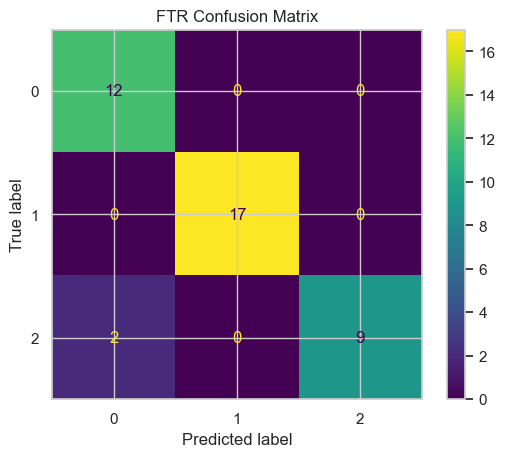

Original HTR Classification Accuracy: 0.875
Confusion Matrix for HTR:
[[15  2  1]
 [ 0 12  1]
 [ 1  0  8]]


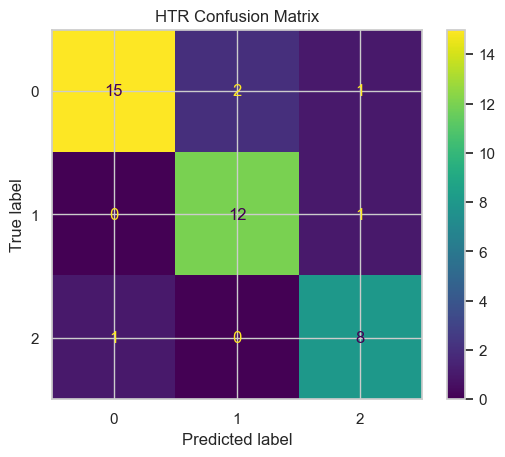

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use original classifiers for evaluation
y_pred_ftr_original = rf_ftr_classifier.predict(X_test)
y_pred_htr_original = rf_htr_classifier.predict(X_test)

# Evaluate original FTR classification model
ftr_accuracy_original = accuracy_score(y_test_ftr, y_pred_ftr_original)
print("Original FTR Classification Accuracy:", ftr_accuracy_original)

# Confusion matrix for FTR
ftr_conf_matrix = confusion_matrix(y_test_ftr, y_pred_ftr_original)
print("Confusion Matrix for FTR:")
print(ftr_conf_matrix)

# Visualize confusion matrix for FTR
ConfusionMatrixDisplay(confusion_matrix=ftr_conf_matrix, display_labels=rf_ftr_classifier.classes_).plot()
plt.title("FTR Confusion Matrix")
plt.show()

# Evaluate original HTR classification model
htr_accuracy_original = accuracy_score(y_test_htr, y_pred_htr_original)
print("Original HTR Classification Accuracy:", htr_accuracy_original)

# Confusion matrix for HTR
htr_conf_matrix = confusion_matrix(y_test_htr, y_pred_htr_original)
print("Confusion Matrix for HTR:")
print(htr_conf_matrix)

# Visualize confusion matrix for HTR
ConfusionMatrixDisplay(confusion_matrix=htr_conf_matrix, display_labels=rf_htr_classifier.classes_).plot()
plt.title("HTR Confusion Matrix")
plt.show()

In [148]:
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Evaluate regression model
y_pred_reg = random_search_regressor.predict(X_test)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression Model Evaluation")
print("---------------------------")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-Squared: {r2:.4f}\n")

# Evaluate FTR classification model
y_pred_ftr = rf_ftr_classifier.predict(X_test)
ftr_accuracy = accuracy_score(y_test_ftr, y_pred_ftr)
ftr_conf_matrix = confusion_matrix(y_test_ftr, y_pred_ftr)
ftr_class_report = classification_report(y_test_ftr, y_pred_ftr)

print("FTR Classification Model Evaluation")
print("-----------------------------------")
print(f"Accuracy: {ftr_accuracy:.4f}")
print("Confusion Matrix:")
print(ftr_conf_matrix)
print("\nClassification Report:")
print(ftr_class_report)

# Evaluate HTR classification model
y_pred_htr = rf_htr_classifier.predict(X_test)
htr_accuracy = accuracy_score(y_test_htr, y_pred_htr)
htr_conf_matrix = confusion_matrix(y_test_htr, y_pred_htr)
htr_class_report = classification_report(y_test_htr, y_pred_htr)

print("\nHTR Classification Model Evaluation")
print("-----------------------------------")
print(f"Accuracy: {htr_accuracy:.4f}")
print("Confusion Matrix:")
print(htr_conf_matrix)
print("\nClassification Report:")
print(htr_class_report)

# Optional: Save evaluation metrics for reporting
evaluation_results = {
    "regression": {
        "mae": mae,
        "r2": r2
    },
    "ftr_classification": {
        "accuracy": ftr_accuracy,
        "confusion_matrix": ftr_conf_matrix.tolist(),
        "classification_report": ftr_class_report
    },
    "htr_classification": {
        "accuracy": htr_accuracy,
        "confusion_matrix": htr_conf_matrix.tolist(),
        "classification_report": htr_class_report
    }
}

import json
with open("models/evaluation_results.json", "w") as f:
    json.dump(evaluation_results, f, indent=4)

Regression Model Evaluation
---------------------------
Mean Absolute Error: 1.1022
R-Squared: 0.4070

FTR Classification Model Evaluation
-----------------------------------
Accuracy: 0.9500
Confusion Matrix:
[[12  0  0]
 [ 0 17  0]
 [ 2  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      1.00      1.00        17
           2       1.00      0.82      0.90        11

    accuracy                           0.95        40
   macro avg       0.95      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40


HTR Classification Model Evaluation
-----------------------------------
Accuracy: 0.8750
Confusion Matrix:
[[15  2  1]
 [ 0 12  1]
 [ 1  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.86      0.92      0.89        13
           2    

In [150]:
# Regression Model Evaluation (for FTHG, FTAG, etc.)
# Ensure that you are evaluating only regression outputs
y_pred_regressor = random_search_regressor.predict(X_test)
regressor_accuracy = random_search_regressor.score(X_test, y_test_reg)  # R^2 for regression
print(f"Regressor Model R^2 Accuracy: {regressor_accuracy * 100:.2f}%")

# Classifier Model Evaluation (for HTR)
# For classification (e.g., FTR), accuracy will be evaluated
y_pred_classifier = rf_htr_classifier.predict(X_test)
classifier_accuracy = rf_htr_classifier.score(X_test, y_test_htr)  # Accuracy for classification
print(f"Classifier Model Accuracy for HTR: {classifier_accuracy * 100:.2f}%")

# Classifier Model Evaluation (for FTR)
# For classification (e.g., FTR), accuracy will be evaluated
y_pred_classifier = rf_ftr_classifier.predict(X_test)
classifier_accuracy = rf_ftr_classifier.score(X_test, y_test_ftr)  # Accuracy for classification
print(f"Classifier Model Accuracy for FTR: {classifier_accuracy * 100:.2f}%")

Regressor Model R^2 Accuracy: 40.70%
Classifier Model Accuracy for HTR: 87.50%
Classifier Model Accuracy for FTR: 95.00%


In [156]:
import numpy as np
import joblib
import pandas as pd

# Load the trained models
#model_path_ftr_classifier = 'models/epl_ftr_model_optimized_ftr_classifier3.pkl'
#model_path_htr_classifier = 'models/epl_ftr_model_optimized_htr_classifier3.pkl'
#model_path_regressor = 'models/epl_ftr_model_optimized_regressor3.pkl'

loaded_ftr_classifier = rf_ftr_classifier
loaded_htr_classifier = rf_htr_classifier
loaded_regressor = random_search_regressor

# Load the label encoder for team names
label_encoder_path = 'models/team_label_encoder.pkl'
label_encoder = joblib.load(label_encoder_path)

# Load the scaler for feature scaling
scaler_path = 'models/scaler.pkl'
scaler = joblib.load(scaler_path)

# Define the feature names used during training
feature_names = [
    'HomeTeam_encoded', 'AwayTeam_encoded', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 
    'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]

# Function to predict match results
def predict_match_results(home_team, away_team):
    # Encode team names
    home_team_encoded = label_encoder.transform([home_team])[0]
    away_team_encoded = label_encoder.transform([away_team])[0]

    # Prepare the feature vector (placeholders for unknown features)
    feature_vector = np.array([[home_team_encoded, away_team_encoded, 
        0, 0,  # Placeholder for FTHG, FTAG (not known beforehand)
        0, 0,  # Placeholder for HTHG, HTAG (not known beforehand)
        0, 0,  # Placeholder for HS, AS (not known beforehand)
        0, 0,  # Placeholder for HST, AST (not known beforehand)
        0, 0,  # Placeholder for HF, AF (not known beforehand)
        0, 0,  # Placeholder for HC, AC (not known beforehand)
        0, 0,  # Placeholder for HY, AY (not known beforehand)
        0, 0   # Placeholder for HR, AR (not known beforehand)
    ]])

    # Convert the feature vector to a DataFrame with the correct column names
    feature_vector_df = pd.DataFrame(feature_vector, columns=feature_names)

    # Scale the feature vector using the scaler
    feature_vector_scaled = scaler.transform(feature_vector_df)

    # Make predictions using the regressor for continuous variables
    continuous_predictions = loaded_regressor.predict(feature_vector_scaled)

    # Round all continuous predictions to integers
    continuous_predictions = np.round(continuous_predictions).astype(int)

    # Make predictions using the classifiers for FTR and HTR
    ftr_prediction = loaded_ftr_classifier.predict(feature_vector_scaled)
    htr_prediction = loaded_htr_classifier.predict(feature_vector_scaled)

    # Create a dictionary for the results
    prediction_results = {
        'Home Team': home_team,
        'Away Team': away_team,
        'FTHG': continuous_predictions[0][0],
        'FTAG': continuous_predictions[0][1],
        'FTR': ftr_prediction[0],  # Classifier prediction for FTR
        'HTHG': continuous_predictions[0][2],
        'HTAG': continuous_predictions[0][3],
        'HTR': htr_prediction[0],  # Classifier prediction for HTR
        'HS': continuous_predictions[0][4],
        'AS': continuous_predictions[0][5],
        'HST': continuous_predictions[0][6],
        'AST': continuous_predictions[0][7],
        'HF': continuous_predictions[0][8],
        'AF': continuous_predictions[0][9],
        'HC': continuous_predictions[0][10],
        'AC': continuous_predictions[0][11],
        'HY': continuous_predictions[0][12],
        'AY': continuous_predictions[0][13],
        'HR': continuous_predictions[0][14],
        'AR': continuous_predictions[0][15]
    }

    return pd.DataFrame([prediction_results])

# Example: User input
home_team = input("Enter Home Team: ")
away_team = input("Enter Away Team: ")

# Predict results
try:
    match_results2_df = predict_match_results(home_team, away_team)
    print("\nPredicted Match Results:")
except Exception as e:
    print(f"Error: {e}")
    
match_results2_df.head()  



Predicted Match Results:


,Home Team,Away Team,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Chelsea,Man City,1,1,0,1,1,0,11,10,4,4,9,9,4,5,2,2,0,0


## Old Copy for epl_2425

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import os

# Ensure model directory exists
os.makedirs('models', exist_ok=True)

# Feature Engineering
epl_2425_modelv5 = epl_2425.copy()

# Encode HomeTeam and AwayTeam columns if not encoded
label_encoder = LabelEncoder()
epl_2425_modelv5['HomeTeam_encoded'] = label_encoder.fit_transform(epl_2425_modelv5['HomeTeam'])
epl_2425_modelv5['AwayTeam_encoded'] = label_encoder.fit_transform(epl_2425_modelv5['AwayTeam'])

# Set features (X) and target variables (y)
X = epl_2425_modelv5[[ 
    'HomeTeam_encoded', 'AwayTeam_encoded', 
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 
    'HS', 'AS', 'HST', 'AST', 
    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]]

# Separate target variables
y_regression = epl_2425_modelv5[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 
                                  'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]  # Continuous features
y_classification = epl_2425_modelv5['FTR']  # Categorical variable for classification (0, 1, or 2)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')

# Save the label encoder (so that you can use it for prediction later)
joblib.dump(label_encoder, 'models/team_label_encoder.pkl')

# Train-test split (80-20)
X_train, X_test, y_train_reg, y_test_reg, y_train_class, y_test_class = train_test_split(
    X_scaled, y_regression, y_classification, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model for continuous variables
rf_regressor = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV for regressor
param_dist_regressor = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
random_search_regressor = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist_regressor, 
                                             n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_regressor.fit(X_train, y_train_reg)
best_rf_regressor = random_search_regressor.best_estimator_

# Initialize Random Forest Classifier model for categorical variable (FTR)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_class)

# Predictions
y_pred_reg = best_rf_regressor.predict(X_test)
y_pred_class = rf_classifier.predict(X_test)

# Evaluate the models
print("Mean Absolute Error (Regressor):", mean_absolute_error(y_test_reg, y_pred_reg))
print("R-Squared (Regressor):", r2_score(y_test_reg, y_pred_reg))
print("Accuracy (Classifier):", accuracy_score(y_test_class, y_pred_class))

# Hyperparameter tuning using GridSearchCV for classifier (Optional, for improvement)
param_grid_classifier = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search_classifier = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_classifier, cv=5, n_jobs=-1, verbose=2)
grid_search_classifier.fit(X_train, y_train_class)

# Get the best models after GridSearchCV
best_rf_classifier = grid_search_classifier.best_estimator_

# Save the best models for future use
joblib.dump(best_rf_regressor, 'models/epl_ftr_model_optimized_regressor.pkl')
joblib.dump(best_rf_classifier, 'models/epl_ftr_model_optimized_classifier.pkl')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Absolute Error (Regressor): 1.1022041807584777
R-Squared (Regressor): 0.40702778516635457
Accuracy (Classifier): 0.95
Fitting 5 folds for each of 81 candidates, totalling 405 fits


['models/epl_ftr_model_optimized_classifier2.pkl']

In [97]:
# Regression Model Evaluation (for FTHG, FTAG, etc.)
# Ensure that you are evaluating only regression outputs
y_pred_regressor = best_rf_regressor.predict(X_test)
regressor_accuracy = best_rf_regressor.score(X_test, y_test_reg)  # R^2 for regression
print(f"Regressor Model R^2 Accuracy: {regressor_accuracy * 100:.2f}%")

# Classifier Model Evaluation (for FTR)
# For classification (e.g., FTR), accuracy will be evaluated
y_pred_classifier = best_rf_classifier.predict(X_test)
classifier_accuracy = best_rf_classifier.score(X_test, y_test_class)  # Accuracy for classification
print(f"Classifier Model Accuracy: {classifier_accuracy * 100:.2f}%")

Regressor Model R^2 Accuracy: 40.70%
Classifier Model Accuracy: 87.50%


In [81]:
import numpy as np
import joblib
import pandas as pd

# Load the trained models
model_path_classifier = 'models/epl_ftr_model_optimized_classifier.pkl'
loaded_classifier = joblib.load(model_path_classifier)

model_path_regressor = 'models/epl_ftr_model_optimized_regressor.pkl'
loaded_regressor = joblib.load(model_path_regressor)

# Load the label encoder for team names
label_encoder_path = 'models/team_label_encoder.pkl'
label_encoder = joblib.load(label_encoder_path)

# Load the scaler for feature scaling
scaler_path = 'models/scaler.pkl'
scaler = joblib.load(scaler_path)

# Define the feature names used during training
feature_names = [
    'HomeTeam_encoded', 'AwayTeam_encoded', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 
    'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]

# Define the target labels (to match the number of output features predicted)
prediction_labels = [
    'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 
    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]

# Function to predict based on user input
def predict_match_results(home_team, away_team):
    # Encode team names
    home_team_encoded = label_encoder.transform([home_team])[0]
    away_team_encoded = label_encoder.transform([away_team])[0]

    # Prepare the feature vector (keeping placeholders for unknown features)
    feature_vector = np.array([[home_team_encoded, away_team_encoded, 
        0, 0,  # Placeholder for FTHG, FTAG (not known beforehand)
        0, 0,  # Placeholder for HTHG, HTAG (not known beforehand)
        0, 0,  # Placeholder for HS, AS (not known beforehand)
        0, 0,  # Placeholder for HST, AST (not known beforehand)
        0, 0,  # Placeholder for HF, AF (not known beforehand)
        0, 0,  # Placeholder for HC, AC (not known beforehand)
        0, 0,  # Placeholder for HY, AY (not known beforehand)
        0, 0   # Placeholder for HR, AR (not known beforehand)
    ]])

    # Convert the feature vector to a DataFrame with the correct column names
    feature_vector_df = pd.DataFrame(feature_vector, columns=feature_names)

    # Scale the feature vector using the scaler (now works with DataFrame)
    feature_vector_scaled = scaler.transform(feature_vector_df)

    # Make predictions using the regressor for continuous variables (FTHG, FTAG, etc.)
    continuous_predictions = loaded_regressor.predict(feature_vector_scaled)

    # Make predictions using the classifier for FTR
    ftr_prediction = loaded_classifier.predict(feature_vector_scaled)

    # Create a dictionary for the results
    prediction_results = {
        'FTHG': continuous_predictions[0][0],
        'FTAG': continuous_predictions[0][1],
        'FTR': ftr_prediction[0],  # Classifier prediction for FTR (0, 1, 2)
        'HTHG': continuous_predictions[0][2],
        'HTAG': continuous_predictions[0][3],
        'HTR': continuous_predictions[0][4],
        'HS': continuous_predictions[0][5],
        'AS': continuous_predictions[0][6],
        'HST': continuous_predictions[0][7],
        'AST': continuous_predictions[0][8],
        'HF': continuous_predictions[0][9],
        'AF': continuous_predictions[0][10],
        'HC': continuous_predictions[0][11],
        'AC': continuous_predictions[0][12],
        'HY': continuous_predictions[0][13],
        'AY': continuous_predictions[0][14],
        'HR': continuous_predictions[0][15],
        'AR': continuous_predictions[0][16]
    }

    return prediction_results

# Example: User input
home_team = input("Enter Home Team: ")
away_team = input("Enter Away Team: ")

# Predict results
try:
    match_results = predict_match_results(home_team, away_team)
    print("\nPredicted Match Results:")
    for key, value in match_results.items():
        print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")
except Exception as e:
    print(f"Error: {e}")

Error: index 16 is out of bounds for axis 0 with size 16


## Prediction and Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Dropdown, interact

# Sample dataset (Ensure this is replaced with actual data you are using)
# epl_2425 should already be loaded with the necessary columns

# Function for making predictions based on Home and Away Team input
def make_prediction(home_team, away_team):
    try:
        # Prepare the input data for prediction (use performance metrics of both teams)
        home_team_encoded = le_home.transform([home_team])[0]
        away_team_encoded = le_away.transform([away_team])[0]
        
        # Fetch the performance data for the Home and Away Team
        home_performance_data = home_performance.loc[home_team]
        away_performance_data = away_performance.loc[away_team]
        
        # Combine performance data into a single input vector
        input_data = pd.DataFrame({
            'HomeTeam_encoded': [home_team_encoded],
            'AwayTeam_encoded': [away_team_encoded],
            'home_goals_scored': [home_performance_data['home_goals_scored']],
            'home_goals_conceded': [home_performance_data['home_goals_conceded']],
            'home_wins': [home_performance_data['home_wins']],
            'home_draws': [home_performance_data['home_draws']],
            'home_losses': [home_performance_data['home_losses']],
            'away_goals_scored': [away_performance_data['away_goals_scored']],
            'away_goals_conceded': [away_performance_data['away_goals_conceded']],
            'away_wins': [away_performance_data['away_wins']],
            'away_draws': [away_performance_data['away_draws']],
            'away_losses': [away_performance_data['away_losses']]
        })
        
        # Make predictions for multiple features
        predictions = model.predict(input_data)
        
        # Extract the predicted values for all features
        predicted_features = dict(zip(y.columns, predictions[0]))
        
        # Ensure 'Date' is in datetime format
        epl_2425['Date'] = pd.to_datetime(epl_2425['Date'])
        
        # Extract Month and Day from the 'Date'
        epl_2425['Month'] = epl_2425['Date'].dt.month
        epl_2425['Day'] = epl_2425['Date'].dt.day
        
        # Month names and numbers mapping
        month_names = {
            'January': 1,
            'February': 2,
            'March': 3,
            'April': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'August': 8,
            'September': 9,
            'October': 10,
            'November': 11,
            'December': 12,
        }
        
        # Function to plot trends based on user input
        def plot_trends(home_team, away_team, month_selection):
            # Filter the data for the selected Home and Away Team
            home_team_data = epl_2425[epl_2425['HomeTeam'] == home_team]
            away_team_data = epl_2425[epl_2425['AwayTeam'] == away_team]
            
            # If month is selected, filter data by the month
            if month_selection != 'All':
                home_team_data = home_team_data[home_team_data['Month'] == month_names[month_selection]]
                away_team_data = away_team_data[away_team_data['Month'] == month_names[month_selection]]
        
            # Plotting both Home Team and Away Team goal distribution as histograms
            fig, axes = plt.subplots(1, 2, figsize=(16, 8))
            
            # If "All" months selected, hide the x-axis
            if month_selection == 'All':
                axes[0].hist(home_team_data['FTHG'], bins=10, color='#1f77b4', edgecolor='black', alpha=0.7)
                axes[0].set_title(f'{home_team} Home Goals Distribution (All Matches)', fontsize=14, weight='bold')
                axes[0].set_xlabel('Goals Scored', fontsize=12)
                axes[0].set_ylabel('Frequency', fontsize=12)
                axes[0].grid(True, linestyle='--', alpha=0.7)
                axes[0].set_xticks([])  # Hide x-axis

                axes[1].hist(away_team_data['FTAG'], bins=10, color='#ff7f0e', edgecolor='black', alpha=0.7)
                axes[1].set_title(f'{away_team} Away Goals Distribution (All Matches)', fontsize=14, weight='bold')
                axes[1].set_xlabel('Goals Scored', fontsize=12)
                axes[1].set_ylabel('Frequency', fontsize=12)
                axes[1].grid(True, linestyle='--', alpha=0.7)
                axes[1].set_xticks([])  # Hide x-axis

            else:
                # Plot histogram for Home Team with Date on X-axis (for selected month)
                axes[0].bar(home_team_data['Date'], home_team_data['FTHG'], color='#1f77b4', edgecolor='black', alpha=0.7)
                axes[0].set_title(f'{home_team} Home Goals by Match Date ({month_selection})', fontsize=14, weight='bold')
                axes[0].set_xlabel('Match Date', fontsize=12)
                axes[0].set_ylabel('Goals Scored', fontsize=12)
                axes[0].grid(True, linestyle='--', alpha=0.7)
                axes[0].tick_params(axis='x', rotation=45)
                
                # Plot histogram for Away Team with Date on X-axis (for selected month)
                axes[1].bar(away_team_data['Date'], away_team_data['FTAG'], color='#ff7f0e', edgecolor='black', alpha=0.7)
                axes[1].set_title(f'{away_team} Away Goals by Match Date ({month_selection})', fontsize=14, weight='bold')
                axes[1].set_xlabel('Match Date', fontsize=12)
                axes[1].set_ylabel('Goals Scored', fontsize=12)
                axes[1].grid(True, linestyle='--', alpha=0.7)
                axes[1].tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()
        
        # Create a dropdown for month selection with month names
        month_dropdown = Dropdown(
            options=['All'] + list(month_names.keys()),
            value='All',
            description='Month:',
            disabled=False
        )
        
        # Interact function to allow user to choose Home Team, Away Team, and Month
        def interactive_plot(month_selection):
            plot_trends(home_team, away_team, month_selection)
        
        # Use interact to create a widget for Month Selection
        interact(interactive_plot, month_selection=month_dropdown)
        
        # Return all predicted feature values
        return predicted_features
    
    except KeyError:
        return "Invalid team name entered. Please check the team names."

# Get user input for teams (These values will be passed to the prediction)
home_team_input = input("Enter Home Team: ")
away_team_input = input("Enter Away Team: ")

# Make prediction
result = make_prediction(home_team_input, away_team_input)

# Display the results for the prediction
print(f"Prediction for {home_team_input} vs {away_team_input}:")
for key, value in result.items():
    print(f"{key}: {value}")


In [140]:
import pandas as pd
from ipywidgets import Dropdown, interact

# Sample dataset (Ensure this is replaced with actual data you are using)
# epl_2425 should already be loaded with the necessary columns

# Function for making predictions based on Home and Away Team input
def make_prediction(home_team, away_team):
    try:
        # Prepare the input data for prediction (use performance metrics of both teams)
        home_team_encoded = le_home.transform([home_team])[0]
        away_team_encoded = le_away.transform([away_team])[0]
        
        # Fetch the performance data for the Home and Away Team
        home_performance_data = home_performance.loc[home_team]
        away_performance_data = away_performance.loc[away_team]
        
        # Combine performance data into a single input vector for prediction
        input_data = pd.DataFrame({
            'HomeTeam_encoded': [home_team_encoded],
            'AwayTeam_encoded': [away_team_encoded],
            'home_goals_scored': [home_performance_data['home_goals_scored']],
            'home_goals_conceded': [home_performance_data['home_goals_conceded']],
            'home_wins': [home_performance_data['home_wins']],
            'home_draws': [home_performance_data['home_draws']],
            'home_losses': [home_performance_data['home_losses']],
            'away_goals_scored': [away_performance_data['away_goals_scored']],
            'away_goals_conceded': [away_performance_data['away_goals_conceded']],
            'away_wins': [away_performance_data['away_wins']],
            'away_draws': [away_performance_data['away_draws']],
            'away_losses': [away_performance_data['away_losses']]
        })
        
        # Make predictions for multiple features
        predictions = model.predict(input_data)
        
        # Extract the predicted values for all features
        predicted_features = dict(zip(y.columns, predictions[0]))
        
        # Get the predicted FTR (Full Time Result)
        predicted_ftr = predicted_features['FTR']
        
        # Determine the winner based on the FTR prediction
        if predicted_ftr == 1:
            winner = f"{home_team} wins"
        elif predicted_ftr == 2:
            winner = f"{away_team} wins"
        else:
            winner = "Draw"
        
        # Display the prediction results
        print(f"Prediction for {home_team} vs {away_team}:")
        for feature, predicted_value in predicted_features.items():
            print(f"{feature}: {predicted_value}")
        
        # Now show the performance metrics for the last 10 matches for both teams
        
        # Ensure 'Date' is in datetime format for filtering by date
        epl_2425['Date'] = pd.to_datetime(epl_2425['Date'])
        
        # Get the last 10 matches for Home Team
        home_team_data = epl_2425[epl_2425['HomeTeam'] == home_team].sort_values(by='Date', ascending=False).head(10)
        # Get the last 10 matches for Away Team
        away_team_data = epl_2425[epl_2425['AwayTeam'] == away_team].sort_values(by='Date', ascending=False).head(10)
        
        # Calculate Points Won for Home Team and Away Team based on the rules
        home_team_data['Points Won'] = home_team_data['FTR'].apply(lambda x: 3 if x == 1 else (1 if x == 0 else 0))
        away_team_data['Points Won'] = away_team_data['FTR'].apply(lambda x: 3 if x == 2 else (1 if x == 0 else 0))
        
        # Separate Home Matches and Away Matches for Home Team
        home_team_home_matches = home_team_data[home_team_data['HomeTeam'] == home_team]
        home_team_away_matches = home_team_data[home_team_data['AwayTeam'] == home_team]
        
        # Separate Home Matches and Away Matches for Away Team
        away_team_home_matches = away_team_data[away_team_data['HomeTeam'] == away_team]
        away_team_away_matches = away_team_data[away_team_data['AwayTeam'] == away_team]
        
        # Display Home Team's Home Matches and Away Matches performance metrics
        print(f"\nPerformance Metrics for {home_team} (Home Team) - Home Matches:")
        home_team_home_performance = home_team_home_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'Points Won']]
        print(home_team_home_performance)
        
        print(f"\nPerformance Metrics for {home_team} (Home Team) - Away Matches:")
        home_team_away_performance = home_team_away_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'Points Won']]
        print(home_team_away_performance)
        
        # Display Away Team's Home Matches and Away Matches performance metrics
        print(f"\nPerformance Metrics for {away_team} (Away Team) - Home Matches:")
        away_team_home_performance = away_team_home_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'Points Won']]
        print(away_team_home_performance)
        
        print(f"\nPerformance Metrics for {away_team} (Away Team) - Away Matches:")
        away_team_away_performance = away_team_away_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'Points Won']]
        print(away_team_away_performance)
        
        # Return the predicted features, the winner, and the separated match data
        return predicted_features, winner, home_team_home_performance, home_team_away_performance, away_team_home_performance, away_team_away_performance
    
    except KeyError:
        return "Invalid team name entered. Please check the team names."

# Get user input for teams
home_team_input = input("Enter Home Team: ")
away_team_input = input("Enter Away Team: ")

# Make prediction and display the performance metrics and winner
result = make_prediction(home_team_input, away_team_input)

# If necessary, display the results for the prediction
# Since we're displaying performance metrics only, there's no need for a loop here anymore.
predicted_features, winner, home_team_home_performance, home_team_away_performance, away_team_home_performance, away_team_away_performance = result

# Display the final winner
print(f"\nConclusive Prediction: {winner}")


Prediction for Man City vs Chelsea:
FTHG: 2.0
FTAG: 2.0
FTR: 0.0
HTHG: 1.0
HTAG: 0.0
HTR: 2.0
HS: 33.0
AS: 5.0
HST: 5.0
AST: 3.0
HF: 7.0
AF: 10.0
HC: 8.0
AC: 2.0
HY: 3.0
AY: 4.0
HR: 0.0
AR: 0.0

Performance Metrics for Man City (Home Team) - Home Matches:
           Date  FTHG  FTAG  FTR    HS   HST    HF    HC   HY   HR  Points Won
9313 2025-01-04     4     1    1  10.0   7.0   8.0   7.0  2.0  0.0           3
9289 2024-12-26     1     1    0  24.0   5.0   5.0   8.0  1.0  0.0           1
9275 2024-12-15     1     2    2  10.0   3.0   5.0   8.0  1.0  0.0           0
9253 2024-12-04     3     0    1  17.0   7.0   7.0   8.0  2.0  0.0           3
9236 2024-11-23     0     4    2  23.0   5.0  19.0   9.0  4.0  0.0           0
9204 2024-10-26     1     0    1  22.0   8.0   9.0  12.0  1.0  0.0           3
9184 2024-10-05     3     2    1  20.0   7.0   4.0   8.0  2.0  0.0           3
9169 2024-09-22     2     2    0  33.0  11.0   7.0   8.0  3.0  0.0           1
9155 2024-09-14     2     1    1 

C:\Users\DALEI\AppData\Local\Temp\ipykernel_11720\484554178.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_2425['Date'] = pd.to_datetime(epl_2425['Date'])


In [159]:
import pandas as pd
# Sample dataset (Ensure this is replaced with actual data you are using)
# epl_2425 should already be loaded with the necessary columns

# Function for making predictions based on Home and Away Team input
def make_prediction(home_team, away_team):
    try:
        # Prepare the input data for prediction (use performance metrics of both teams)
        home_team_encoded = le_home.transform([home_team])[0]
        away_team_encoded = le_away.transform([away_team])[0]
        
        # Fetch the performance data for the Home and Away Team
        home_performance_data = home_performance.loc[home_team]
        away_performance_data = away_performance.loc[away_team]
        
        # Combine performance data into a single input vector for prediction
        input_data = pd.DataFrame({
            'HomeTeam_encoded': [home_team_encoded],
            'AwayTeam_encoded': [away_team_encoded],
            'home_goals_scored': [home_performance_data['home_goals_scored']],
            'home_goals_conceded': [home_performance_data['home_goals_conceded']],
            'home_wins': [home_performance_data['home_wins']],
            'home_draws': [home_performance_data['home_draws']],
            'home_losses': [home_performance_data['home_losses']],
            'away_goals_scored': [away_performance_data['away_goals_scored']],
            'away_goals_conceded': [away_performance_data['away_goals_conceded']],
            'away_wins': [away_performance_data['away_wins']],
            'away_draws': [away_performance_data['away_draws']],
            'away_losses': [away_performance_data['away_losses']]
        })
        
        # Get the predicted FTR (Full Time Result)
        predicted_ftr = predicted_features['FTR']
        
        # Determine the winner based on the FTR prediction
        if predicted_ftr == 1:
            winner = f"{home_team} wins"
        elif predicted_ftr == 2:
            winner = f"{away_team} wins"
        else:
            winner = "Draw"
        
        # Display the prediction results
        print(f"Prediction for {home_team} vs {away_team}:")
        for feature, predicted_value in predicted_features.items():
            print(f"{feature}: {predicted_value}")
        
        # Predict the FTR using the trained model (epl_2425_model is your model)
        y_pred = epl_2425_model.predict(input_data)
        
        # Get predicted FTR (Full Time Result)
        predicted_ftr = y_pred[0]
        
        # Ensure 'Date' is in datetime format for filtering by date
        epl_2425['Date'] = pd.to_datetime(epl_2425['Date'])
        
        # Get the last 20 matches for Home Team
        home_team_data = epl_2425[epl_2425['HomeTeam'] == home_team].sort_values(by='Date', ascending=False).head(10)
        # Get the last 20 matches for Away Team
        away_team_data = epl_2425[epl_2425['AwayTeam'] == away_team].sort_values(by='Date', ascending=False).head(10)
        
        # Calculate Result based on FTR for Home Team and Away Team
        def result_from_ftr(ftr, is_home):
            if is_home:  # For Home Team
                return 'Win' if ftr == 1 else ('Draw' if ftr == 0 else 'Loss')
            else:  # For Away Team
                return 'Win' if ftr == 2 else ('Draw' if ftr == 0 else 'Loss')
        
        # Calculate Result for Home Team's matches
        home_team_data['Result'] = home_team_data['FTR'].apply(lambda x: result_from_ftr(x, True))
        home_team_data['Color'] = home_team_data['Result'].apply(lambda x: 'green' if x == 'Win' else ('grey' if x == 'Draw' else 'red'))
        
        # Calculate Result for Away Team's matches
        away_team_data['Result'] = away_team_data['FTR'].apply(lambda x: result_from_ftr(x, False))
        away_team_data['Color'] = away_team_data['Result'].apply(lambda x: 'green' if x == 'Win' else ('grey' if x == 'Draw' else 'red'))
        
        # Separate Home Matches and Away Matches for Home Team
        home_team_home_matches = home_team_data[home_team_data['HomeTeam'] == home_team]
        home_team_away_matches = home_team_data[home_team_data['AwayTeam'] == home_team]
        
        # Separate Home Matches and Away Matches for Away Team
        away_team_home_matches = away_team_data[away_team_data['HomeTeam'] == away_team]
        away_team_away_matches = away_team_data[away_team_data['AwayTeam'] == away_team]
        
        # Display Home Team's Home Matches and Away Matches performance metrics
        print(f"\nPerformance Metrics for {home_team} (Home Team) - Home Matches:")
        home_team_home_performance = home_team_home_matches[['Date', 'FTHG', 'FTAG', 'Result', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR']]
        print(home_team_home_performance)
        
        print(f"\nPerformance Metrics for {home_team} (Home Team) - Away Matches:")
        home_team_away_performance = home_team_away_matches[['Date', 'FTHG', 'FTAG', 'Result', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR']]
        print(home_team_away_performance)
        
        # Display Away Team's Home Matches and Away Matches performance metrics
        print(f"\nPerformance Metrics for {away_team} (Away Team) - Home Matches:")
        away_team_home_performance = away_team_home_matches[['Date', 'FTHG', 'FTAG', 'Result', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR']]
        print(away_team_home_performance)
        
        print(f"\nPerformance Metrics for {away_team} (Away Team) - Away Matches:")
        away_team_away_performance = away_team_away_matches[['Date', 'FTHG', 'FTAG', 'Result', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR']]
        print(away_team_away_performance)
        
        # Return the predicted features, the winner, and the separated match data
        return predicted_features, winner, home_team_home_performance, home_team_away_performance, away_team_home_performance, away_team_away_performance
    
    except KeyError:
        return "Invalid team name entered. Please check the team names."

# Get user input for teams
home_team_input = input("Enter Home Team: ")
away_team_input = input("Enter Away Team: ")

# Make prediction and display the performance metrics and winner
result = make_prediction(home_team_input, away_team_input)

predicted_features, winner, home_team_home_performance, home_team_away_performance, away_team_home_performance, away_team_away_performance = result

# Display the final winner
print(f"\nConclusive Prediction: {winner}")

Prediction for Arsenal vs Man City:
FTHG: 2.0
FTAG: 1.0
FTR: 1.0
HTHG: 1.0
HTAG: 0.0
HTR: 1.0
HS: 19.0
AS: 10.0
HST: 4.0
AST: 4.0
HF: 12.0
AF: 16.0
HC: 9.0
AC: 4.0
HY: 3.0
AY: 3.0
HR: 0.0
AR: 0.0


AttributeError: 'DataFrame' object has no attribute 'predict'

In [151]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample function to encode teams (assuming you've already loaded your dataset epl_2425)
# Fit the LabelEncoder with the unique team names

# Ensure you have the necessary model loaded (e.g., epl_2425_model)

# Fit the LabelEncoders with team names
le_home = LabelEncoder()
le_away = LabelEncoder()

# Get unique teams from HomeTeam and AwayTeam columns (assuming epl_2425 is your DataFrame)
teams = pd.concat([epl_2425['HomeTeam'], epl_2425['AwayTeam']]).unique()

# Fit the encoder with teams
le_home.fit(teams)
le_away.fit(teams)

# Example function to make a prediction based on user input for home and away teams
def make_prediction(home_team, away_team):
    try:
        # Encode the teams
        home_team_encoded = le_home.transform([home_team])[0]
        away_team_encoded = le_away.transform([away_team])[0]
        
        # Fetch the performance data for the Home and Away Team (assumes your performance data is preloaded)
        home_performance_data = home_performance.loc[home_team]  # Assume this is available
        away_performance_data = away_performance.loc[away_team]  # Assume this is available
        
        # Prepare the input data for prediction
        input_data = pd.DataFrame({
            'HomeTeam_encoded': [home_team_encoded],
            'AwayTeam_encoded': [away_team_encoded],
            'home_goals_scored': [home_performance_data['home_goals_scored']],
            'home_goals_conceded': [home_performance_data['home_goals_conceded']],
            'home_wins': [home_performance_data['home_wins']],
            'home_draws': [home_performance_data['home_draws']],
            'home_losses': [home_performance_data['home_losses']],
            'away_goals_scored': [away_performance_data['away_goals_scored']],
            'away_goals_conceded': [away_performance_data['away_goals_conceded']],
            'away_wins': [away_performance_data['away_wins']],
            'away_draws': [away_performance_data['away_draws']],
            'away_losses': [away_performance_data['away_losses']]
        })
        
        # Predict the FTR using the trained model (epl_2425_model is your model)
        y_pred = epl_2425_model.predict(input_data)
        
        # Get predicted FTR (Full Time Result)
        predicted_ftr = y_pred[0]
        
        # Determine the winner based on the FTR prediction
        if predicted_ftr == 1:
            winner = f"{home_team} wins"
        elif predicted_ftr == 2:
            winner = f"{away_team} wins"
        else:
            winner = "Draw"
        
        # Now, let's get the last 10 matches for both teams
        epl_2425['Date'] = pd.to_datetime(epl_2425['Date'])
        
        # Get the last 10 matches for Home Team and Away Team
        home_team_data = epl_2425[epl_2425['HomeTeam'] == home_team].sort_values(by='Date', ascending=False).head(10)
        away_team_data = epl_2425[epl_2425['AwayTeam'] == away_team].sort_values(by='Date', ascending=False).head(10)
        
        # Calculate Points Won for Home Team and Away Team based on FTR
        home_team_data['Result'] = home_team_data['FTR'].apply(lambda x: 'Win (3 Points)' if x == 1 else ('Draw (1 Point)' if x == 0 else 'Loss (0 Points)'))
        away_team_data['Result'] = away_team_data['FTR'].apply(lambda x: 'Win (3 Points)' if x == 2 else ('Draw (1 Point)' if x == 0 else 'Loss (0 Points)'))
        
        # Separate Home Matches and Away Matches for Home Team
        home_team_home_matches = home_team_data[home_team_data['HomeTeam'] == home_team]
        home_team_away_matches = home_team_data[home_team_data['AwayTeam'] == home_team]
        
        # Separate Home Matches and Away Matches for Away Team
        away_team_home_matches = away_team_data[away_team_data['HomeTeam'] == away_team]
        away_team_away_matches = away_team_data[away_team_data['AwayTeam'] == away_team]
        
        # Display performance metrics for Home Team
        print(f"\nPerformance Metrics for {home_team} (Home Team) - Home Matches:")
        print(home_team_home_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'Result']])
        
        print(f"\nPerformance Metrics for {home_team} (Home Team) - Away Matches:")
        print(home_team_away_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'Result']])
        
        # Display performance metrics for Away Team
        print(f"\nPerformance Metrics for {away_team} (Away Team) - Home Matches:")
        print(away_team_home_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'Result']])
        
        print(f"\nPerformance Metrics for {away_team} (Away Team) - Away Matches:")
        print(away_team_away_matches[['Date', 'FTHG', 'FTAG', 'FTR', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'Result']])
        
        # Display the prediction result
        print(f"\nConclusive Prediction: {winner}")
        
        return winner
    
    except KeyError:
        print("Invalid team name entered. Please check the team names.")
        return None

# Get user input for Home Team and Away Team
home_team_input = input("Enter Home Team: ")
away_team_input = input("Enter Away Team: ")

# Make prediction and display results
make_prediction(home_team_input, away_team_input)


AttributeError: 'DataFrame' object has no attribute 'predict'

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Actual FTR values from your dataset (true values)
y_true = epl_2425['FTR'].values  # Replace with actual FTR values from your dataset

# Prepare your input data for the prediction (ensure 'input_data' is defined)
# input_data should be your features prepared for the model

# Make predictions using the trained model (epl_2425_model)
y_pred = epl_2425_model.predict(input_data)  # Make predictions using your trained model

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

AttributeError: 'DataFrame' object has no attribute 'predict'

## This can be done for the rest of the Leagues as well

#### Combining all the Seasons
La Liga

In [32]:
import glob
import os

# Path to the folder containing the season datasets
data_folder = "data/la-liga" 

# Get all file paths matching the pattern "season-XXXX.csv"
file_paths = glob.glob(os.path.join(data_folder, "season-*.csv"))

# Create an empty list to store dataframes
dataframes = []

# Process each file
for file_path in file_paths:
    # Extract season year from filename
    season_year = os.path.basename(file_path).split('-')[1].split('.')[0]  # Assumes file names like "season-1993.csv"
    
    # Read the dataset
    df = pd.read_csv(file_path)
    
    # Add the season column as the first column
    df.insert(0, 'Season', season_year)

    # Append the dataframe to the list
    dataframes.append(df)

# Combine all the dataframes into one
laligacombined_data = pd.concat(dataframes, ignore_index=True)

# Save the combined dataset in the same folder
output_path = os.path.join(data_folder, "laligacombined_seasons_data.csv")
laligacombined_data.to_csv(output_path, index=False)

print("All season datasets combined successfully!")
print("Combined dataset saved at:", output_path)
print("Combined dataset shape:", laligacombined_data.shape)

All season datasets combined successfully!
Combined dataset saved at: data/la-liga\laligacombined_seasons_data.csv
Combined dataset shape: (12126, 23)


In [33]:
laligacombined_data.head(20)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0001,09/09/00,Barcelona,Malaga,2,1,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001,09/09/00,La Coruna,Ath Bilbao,2,0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001,09/09/00,Real Madrid,Valencia,2,1,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001,09/09/00,Sociedad,Santander,2,2,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001,09/09/00,Zaragoza,Espanol,1,2,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0001,10/09/00,Las Palmas,Alaves,0,3,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0001,10/09/00,Mallorca,Valladolid,1,1,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0001,10/09/00,Numancia,Oviedo,1,0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0001,10/09/00,Osasuna,Celta,0,2,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0001,10/09/00,Villarreal,Vallecano,1,5,A,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
